# TODO: introductory paragraph

In [121]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy.stats as stats

import os
import gc

## **Loading Data**

In [122]:
# Define file paths
PREPROC_PATH = "data/amr_diab_songs_proc.csv"
PREPROC_SW_PATH = "data/stop_words.txt"

In [123]:
songs_proc = pd.read_csv(PREPROC_PATH, header=0)
songs_proc

Year         Composer          Lyricist                Song  \
0    2023   محمد أحمد فؤاد         تامر حسين             بيوحشنا   
1    2023     أحمد إبراهيم     أيمن بهجت قمر  معرفش حد بالأسم ده   
2    2023        محمد يحيي   بهاء الدين محمد           ظبط مودها   
3    2023        محمد يحيي     محمد القاياتي          سلامك وصلي   
4    2023        محمد يحيي       محمد البوغة       واخدين راحتهم   
..    ...              ...               ...                 ...   
304  1983       هاني شنودة          هاني ذكي               الزمن   
305  1983       هاني شنودة  عبد الرحيم منصور          نور يا ليل   
306  1983    عزمي الكيلاني      عصام عبدالله          وقت وعشناه   
307  1983  ياسر عبد الحليم       عوض الرخاوي           أحلى دنيا   
308  1983       هاني شنودة          هاني ذكي         أحضان الجبل   

                                                Lyrics       Decade  \
0    ['ملازمنا', 'ملازمنا', 'خياله', 'وطيفه', 'فين'...  Early 2020s   
1    ['اعرفش', 'بالاسم', 'تاه', 'عقله', 'ولقاه', 'ا...  Early 2020s   
2    ['تظبط', 'مودها', 'اطلب', 'عينيها', 'تاخدها', ...  Early 2020s   
3    ['سلامك', 'وصلي', 'واتاريني', 'واحشك', 'واحشني...  Early 2020s   
4    ['واخذين', 'راحتهم', 'قاعدين', 'قلبي', 'مربعين...  Early 2020s   
..                                                 ...          ...   
304  ['الزمن', 'بينسي', 'دايما', 'الزمن', 'مفيش', '...  Early 1980s   
305  ['نور', 'ليل', 'الاسرار', 'عشقناك', 'واحنا', '...  Early 1980s   
306  ['وقت', 'وعشناه', 'جرح', 'حفرناه', 'لبقيه', 'ع...  Early 1980s   
307  ['امتي', 'نشوف', 'البسمه', 'الحلوه', 'ماليه', ...  Early 1980s   
308  ['والشمس', 'طالعه', 'بالوانها', 'الرقيقه', 'ول...  Early 1980s   

    Composer_first_name Composer_last_name Lyricist_first_name  \
0                  محمد          أحمد فؤاد                تامر   
1                  أحمد            إبراهيم                أيمن   
2                  محمد               يحيي                بهاء   
3                  محمد               يحيي                محمد   
4                  محمد               يحيي                محمد   
..                  ...                ...                 ...   
304                هاني              شنودة                هاني   
305                هاني              شنودة                 عبد   
306                عزمي           الكيلاني                عصام   
307                ياسر         عبد الحليم                 عوض   
308                هاني              شنودة                هاني   

    Lyricist_last_name  
0                 حسين  
1             بهجت قمر  
2           الدين محمد  
3             القاياتي  
4               البوغة  
..                 ...  
304                ذكي  
305       الرحيم منصور  
306            عبدالله  
307            الرخاوي  
308                ذكي  

[309 rows x 10 columns]

## **Some High Level Statistical Aggregates of the Data**

After loading the cleaned dataset, we'll start by examining high-level statistics about the lyrics of Amr Diab’s songs, including counts of songs, composers, lyricists, and the number of words used (after stopword removal).

In [124]:
# Print dataset statistics
print("Total number of songs in the dataset:", songs_proc["Song"].nunique())

print("Total number of composers:", songs_proc["Composer"].str.strip().nunique()) # set removes duplicates
print("Total number of lyricists:", songs_proc["Lyricist"].str.strip().nunique())

# Assuming 'Word' contains processed words after removing stopwords
print("Total number of words in all lyrics (after removing stopwords):", songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum())

all_words = songs_proc["Lyrics"].apply(lambda lyrics: str(lyrics).split()).explode() # .explode() flattens all words from all songs into one long list
unique_total_words = len(set(all_words))
print("Total number of unique words in all lyrics (after removing stopwords):", unique_total_words) 

Total number of songs in the dataset: 309
Total number of composers: 77
Total number of lyricists: 55
Total number of words in all lyrics (after removing stopwords): 38024
Total number of unique words in all lyrics (after removing stopwords): 5872


## **Some initial simple analysis to specific words**


### Initial investigation using the keyword حب (love)

This is a targeted keyword analysis designed to investigate how frequently and in what forms the Arabic word "حب" (love) appears in Amr Diab's lyrics. Since he's widely known for romantic songs, exploring this keyword gives insight into how central the theme of love is in his work, including how often and in what variations it's used (ex: "حبك", "أحب", "محبة").

In [125]:
# Define the keyword حب (Arabic for "love")
keyword = 'حب'  

# Filter rows where "Lyrics" contains the keyword
songs_2_1 = songs_proc.loc[songs_proc["Lyrics"].str.contains(keyword, na=False)].copy()
songs_2_1["keyword = 'حب'"] = songs_2_1["Lyrics"].apply(lambda lyrics: [word for word in str(lyrics).split() if keyword in word])

songs_2_1

Year         Composer       Lyricist         Song  \
0    2023   محمد أحمد فؤاد      تامر حسين      بيوحشنا   
3    2023        محمد يحيي  محمد القاياتي   سلامك وصلي   
5    2023        عمرو دياب      تامر حسين        مكانك   
6    2023        عمرو دياب      تامر حسين       لوحدنا   
7    2023        محمد قماح      تامر حسين   الكلام ليك   
..    ...              ...            ...          ...   
303  1983    عزمي الكيلاني   عصام عبدالله   بحب الحياة   
304  1983       هاني شنودة       هاني ذكي        الزمن   
306  1983    عزمي الكيلاني   عصام عبدالله   وقت وعشناه   
307  1983  ياسر عبد الحليم    عوض الرخاوي    أحلى دنيا   
308  1983       هاني شنودة       هاني ذكي  أحضان الجبل   

                                                Lyrics       Decade  \
0    ['ملازمنا', 'ملازمنا', 'خياله', 'وطيفه', 'فين'...  Early 2020s   
3    ['سلامك', 'وصلي', 'واتاريني', 'واحشك', 'واحشني...  Early 2020s   
5    ['عارف', 'جنبك', 'بحلم', 'يجي', 'نبقي', 'اتملي...  Early 2020s   
6    ['شاغلنا', 'ناس', 'ومين', 'هاممنا', 'يتقال', '...  Early 2020s   
7    ['الكلام', 'ليك', 'بحبك', 'اختياري', 'وشاري', ...  Early 2020s   
..                                                 ...          ...   
303  ['بحبك', 'عيون', 'الحياه', 'بشوف', 'بيكي', 'ام...  Early 1980s   
304  ['الزمن', 'بينسي', 'دايما', 'الزمن', 'مفيش', '...  Early 1980s   
306  ['وقت', 'وعشناه', 'جرح', 'حفرناه', 'لبقيه', 'ع...  Early 1980s   
307  ['امتي', 'نشوف', 'البسمه', 'الحلوه', 'ماليه', ...  Early 1980s   
308  ['والشمس', 'طالعه', 'بالوانها', 'الرقيقه', 'ول...  Early 1980s   

    Composer_first_name Composer_last_name Lyricist_first_name  \
0                  محمد          أحمد فؤاد                تامر   
3                  محمد               يحيي                محمد   
5                  عمرو               دياب                تامر   
6                  عمرو               دياب                تامر   
7                  محمد               قماح                تامر   
..                  ...                ...                 ...   
303                عزمي           الكيلاني                عصام   
304                هاني              شنودة                هاني   
306                عزمي           الكيلاني                عصام   
307                ياسر         عبد الحليم                 عوض   
308                هاني              شنودة                هاني   

    Lyricist_last_name                                     keyword = 'حب'  
0                 حسين                                   ['احب',, 'احب',]  
3             القاياتي           ['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',]  
5                 حسين  ['حبيت',, 'وصاحبتها',, 'حبنا',, 'حبيت',, 'حبيت...  
6                 حسين  ['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيب...  
7                 حسين  ['بحبك',, 'بحبك',, 'احب',, 'احب',, 'احب',, 'اح...  
..                 ...                                                ...  
303            عبدالله  [['بحبك',, 'بحبك',, 'حبيبتي',, 'حبيبتي',, 'بحب...  
304                ذكي                                 ['صاحب',, 'صاحب',]  
306            عبدالله  ['حبنا',, 'حبنا',, 'حبيبتي',, 'ياحبيبتي',, 'يا...  
307            الرخاوي  ['بتحب',, 'الحب',, 'الحب',, 'بتحب',, 'الحب',, ...  
308                ذكي                                ['حبيبي',, 'وحبي',]  

[244 rows x 11 columns]

In [126]:
songs_with_keyword1 =  songs_2_1["keyword = 'حب'"].apply(lambda words: len(words))
songs_lyrics = songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split()))

# Total occurrences of words containing the subword "حب" (with repetitions)
total_occurrences =songs_with_keyword1.sum()
total_words = songs_lyrics.sum()

print(f"Total number of occurrences of words containing the subword حب (with repetitions) across all songs:")
print(total_occurrences)
print(f"Out of a total number of {total_words} words.")
print(f"Percentage is: {(total_occurrences / total_words) * 100:.2f}%\n")

# Total occurrences of words containing the subword "حب" (without repetitions)
all_love_words = songs_2_1["keyword = 'حب'"].explode()
unique_occurrences = len(set(all_love_words))

all_words = songs_proc["Lyrics"].apply(lambda lyrics: str(lyrics).split()).explode() # unique total words in all lyrics
unique_total_words = len(set(all_words))

print(f"Total number of occurrences of words containing the subword حب (without repetitions) across all songs:")
print(unique_occurrences)
print(f"Out of a total number of {unique_total_words} unique words.")
print(f"Percentage is: {(unique_occurrences / unique_total_words) * 100:.2f}%\n")

Total number of occurrences of words containing the subword حب (with repetitions) across all songs:
2209
Out of a total number of 38024 words.
Percentage is: 5.81%

Total number of occurrences of words containing the subword حب (without repetitions) across all songs:
129
Out of a total number of 5872 unique words.
Percentage is: 2.20%



In [127]:
# Number of songs with lyrics containing the subword "حب"
num_songs_with_keyword1 = songs_with_keyword1.count()
total_songs = songs_proc["Song"].nunique()

print("Number of songs with lyrics containing the subword حب:")
print(num_songs_with_keyword1)
print(f"Out of a total of: {total_songs} songs.")
print(f"Percentage is: {(num_songs_with_keyword1 / total_songs) * 100:.2f}%\n")

print("Songs with lyrics containing the subword حب:")
print(songs_2_1["Song"].unique())  # Print song titles

Number of songs with lyrics containing the subword حب:
244
Out of a total of: 309 songs.
Percentage is: 78.96%

Songs with lyrics containing the subword حب:
['بيوحشنا' 'سلامك وصلي' 'مكانك' 'لوحدنا' 'الكلام ليك' 'ما تتعوضش'
 'مابتغيبش' 'يا قمر' 'حبيبي' 'ورماني الشوق' 'إيه بس اللي رماك' 'إلا معاك'
 'ناوي تعاتب' 'أنا عاشق' 'مستغرب ليه' 'نور العين' 'مش هضعف' 'نفس المكان'
 'ليلة من عمري' 'من أول مرة' 'إوعدني' 'يو منهم' 'بقدم قلبي' 'إلا حبيبي'
 'الله على حبك' 'حلوة الأيام' 'طمني' 'مالك' 'وحیاتي خلیكي'
 'عيني وأنا شايفه' 'آه من الفراق' 'بعدت ليه' 'ليلي نهاري' 'وحشتيني'
 'تنسى واحدة' 'خد قلبي معاه' 'يدق الباب' 'دايماً في بالي' 'خلينا نشوفك'
 'إلا هي' 'ريحة الحبايب' 'نقول إيه' 'الليلة دي' 'طول ما أنا شايفك'
 'حكايات' 'إنت الغالي' 'روحي مرتحالك' 'قالتلي قول' 'وفهمت عينيك' 'ضحكت'
 'خليك معايا' 'شفت الايام' 'وهتبتدي الحكايات' 'انا مش اناني' 'ونعيش'
 'ساعة الفراق' 'جنا' ' كان كل حاجة' ' ايوة اتغيرت' 'اهو ليل وعدى'
 'الليلة ' 'عندي سؤال' 'خلينا لوحدينا' 'مفيش منك' 'سبت فراغ كبير'
 'حبيت يا قلبي' 'لف

Nearly 4 out of every 5 songs by Amr Diab include some form of "love" in the lyrics. This confirms that love is a dominant theme across his discography, not just in vocabulary, but in song-level content too. The analysis clearly shows that "حب" is not just a common word, but a prominent theme in Amr Diab’s music. The high frequency, vocabulary presence, and song coverage all support this.

Next we get a sample of the songs containing the subword حب (love) along with some information about the song and the corresponding inclusive words. The frequency column indicates the number of words in the corresponding song that
includes the subword حب (love).

In [128]:
# Calculate word frequency per song
songs_2_1["Frequency"] = songs_2_1["keyword = 'حب'"].apply(lambda words: len(words))

# Keep only necessary columns and sort by frequency
songs_2_1 = songs_2_1[["Song","Lyrics", "Decade", "Composer", "Lyricist","keyword = 'حب'", "Frequency"]].sort_values(by="Frequency", ascending=False)

songs_2_1

Song                                             Lyrics  \
104            حبينا  ['حبينا', 'حبينا', 'حبينا', 'حبينا', 'حبينا', ...   
20         نور العين  ['حبيبي', 'نور', 'ساكن', 'خيالي', 'عاشق', 'بقا...   
238           حبيتها  ['قلبي', 'بقولها', 'حبيتها', 'حبيتها', 'قلبي',...   
216         اه حبيبي  ['يملي', 'عينيا', 'حبيبي', 'عايز', 'اعيش', 'وي...   
303       بحب الحياة  ['بحبك', 'عيون', 'الحياه', 'بشوف', 'بيكي', 'ام...   
..               ...                                                ...   
243            لا لا  ['شوفت', 'ياما', 'الدنيا', 'ياما', 'ياما', 'يا...   
282           زيتوني  ['زيتوني', 'عيونك', 'سحروني', 'والله', 'عيونك'...   
280  يا طير يا متغرب  ['طير', 'متغرب', 'بيتك', 'الاخضر', 'قرب', 'طير...   
290         مية مية   ['ميه', 'ميه', 'ميه', 'ميه', 'الحلاوه', 'الربا...   
300            مصرية  ['مصريه', 'بعيون', 'مصريه', 'خطوتها', 'شابه', ...   

          Decade        Composer      Lyricist  \
104   Late 1980s       وفاء حسين   رفعت الشريف   
20    Late 1990s   ناصر المزداوي      أحمد شتا   
238  Early 1990s  حجاج عبدالرحمن   مجدى النجار   
216   Late 2010s       مديح محسن      هاني رجب   
303  Early 1980s   عزمي الكيلاني  عصام عبدالله   
..           ...             ...           ...   
243   Late 2010s     عمرو طنطاوي     تامر حسين   
282   Late 1980s   يحيى عبد الله   مجدي النجار   
280   Late 1980s    مصطفى دويدار  إبراهيم حسين   
290   Late 1980s       عمرو دياب   مجدي النجار   
300  Early 1980s      محمد قابيل     شوقي حجاب   

                                        keyword = 'حب'  Frequency  
104  [['حبينا',, 'حبينا',, 'حبينا',, 'حبينا',, 'حبي...         74  
20   [['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبي...         57  
238  ['حبيتها',, 'حبيتها',, 'حبيتها',, 'حبيتها',, '...         45  
216  ['حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيبي',, 'حبيب...         42  
303  [['بحبك',, 'بحبك',, 'حبيبتي',, 'حبيبتي',, 'بحب...         34  
..                                                 ...        ...  
243                                         ['حبتني',]          1  
282                                           ['يحب',]          1  
280                                           ['حبت',]          1  
290                                          ['الحب',]          1  
300                                       ['الحبيبه',]          1  

[244 rows x 7 columns]

Next we only select a smaller random sample of songs.


In [129]:
n_samples = 20  # Number of random songs containing the word "حب" (love)

# Ungroup and randomly sample n_samples rows
songs_2_2 = songs_2_1.sample(n=n_samples, random_state=42)

In [130]:
# Display the DataFrame with alternating row colors
songs_2_2.style.set_properties(**{'color': 'white'})

Free up memory


In [131]:
del songs_2_1
del songs_2_2

### Comparing with other words across different themes

In [132]:
# List of keywords for comparison
keywords = ['حب', 'قلب', 'عين', 'دموع', 'حياة']
keyword_stats = {}

# Loop through each keyword to calculate its statistics
for keyword in keywords:
    # Filter songs that contain the keyword
    songs_with_keyword = songs_proc[songs_proc["Lyrics"].str.contains(keyword, na=False)]
    
    # Calculate the total occurrences of the keyword (with repetitions)
    keyword_occurrences = songs_with_keyword["Lyrics"].apply(lambda lyrics: str(lyrics).split()).explode().apply(lambda word: keyword in word).sum()
    
    # Calculate total number of words in all lyrics (with repetitions)
    total_words = songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()
    
    # Calculate the total number of songs containing the keyword
    num_songs_with_keyword = songs_with_keyword["Song"].nunique()
    total_songs = songs_proc["Song"].nunique()
    
    # Store the statistics for each keyword
    keyword_stats[keyword] = {
        "keyword_occurrences": keyword_occurrences,
        "total_words": total_words,
        "num_songs_with_keyword": num_songs_with_keyword,
        "total_songs": total_songs,
        "percentage_occurrences": (keyword_occurrences / total_words) * 100,
        "percentage_songs": (num_songs_with_keyword / total_songs) * 100
    }

# Print the statistics for each keyword
for keyword, stats in keyword_stats.items():
    print(f"\nStatistics for the word '{keyword}':")
    print(f"Total number of occurrences (with repetitions): {stats['keyword_occurrences']} out of a total number of {stats['total_words']} words ({stats['percentage_occurrences']:.2f}%).")
    print(f"Number of songs with lyrics containing '{keyword}': {stats['num_songs_with_keyword']} out of a total of {stats['total_songs']} songs.")
    print(f"Percentage of songs: {stats['percentage_songs']:.2f}%")



Statistics for the word 'حب':
Total number of occurrences (with repetitions): 2209 out of a total number of 38024 words (5.81%).
Number of songs with lyrics containing 'حب': 244 out of a total of 309 songs.
Percentage of songs: 78.96%

Statistics for the word 'قلب':
Total number of occurrences (with repetitions): 1067 out of a total number of 38024 words (2.81%).
Number of songs with lyrics containing 'قلب': 207 out of a total of 309 songs.
Percentage of songs: 66.99%

Statistics for the word 'عين':
Total number of occurrences (with repetitions): 478 out of a total number of 38024 words (1.26%).
Number of songs with lyrics containing 'عين': 110 out of a total of 309 songs.
Percentage of songs: 35.60%

Statistics for the word 'دموع':
Total number of occurrences (with repetitions): 20 out of a total number of 38024 words (0.05%).
Number of songs with lyrics containing 'دموع': 8 out of a total of 309 songs.
Percentage of songs: 2.59%

Statistics for the word 'حياة':
Total number of occur

The analysis of key thematic words in Amr Diab’s song lyrics highlights the central focus on emotional and romantic themes. The word حب (love) dominates both in frequency and song coverage, appearing 2,209 times (5.81% of all words) and in 244 songs (78.96%). This suggests that love is a predominant theme in his music, present in nearly 80% of his songs. The word قلب (heart) also features prominently, with 1,067 occurrences (2.81%) and appearing in 207 songs (66.99%), reinforcing the emotional connection in his lyrics. The word عين (eye), while symbolizing perception or longing, is mentioned 478 times (1.26%) and found in 110 songs (35.60%), indicating its less frequent but notable presence. دموع (tears) is much rarer, appearing only 20 times (0.05%) and in just 8 songs (2.59%), highlighting its occasional use to convey sadness or emotional depth. Finally, حياة (life) is completely absent, both in terms of occurrences and song coverage, suggesting that while life-related themes may be present, the specific term "حياة" is not central to his lyrics. Overall, the analysis reflects Amr Diab's consistent focus on love and emotions, with less emphasis on sorrow or life itself.

## **Temporal Rate of Singing Performance**


In this subsection we study the evolution of the songing activity in terms of the number of songs produced per year as a fine scale and per decade as a more coarse scale.

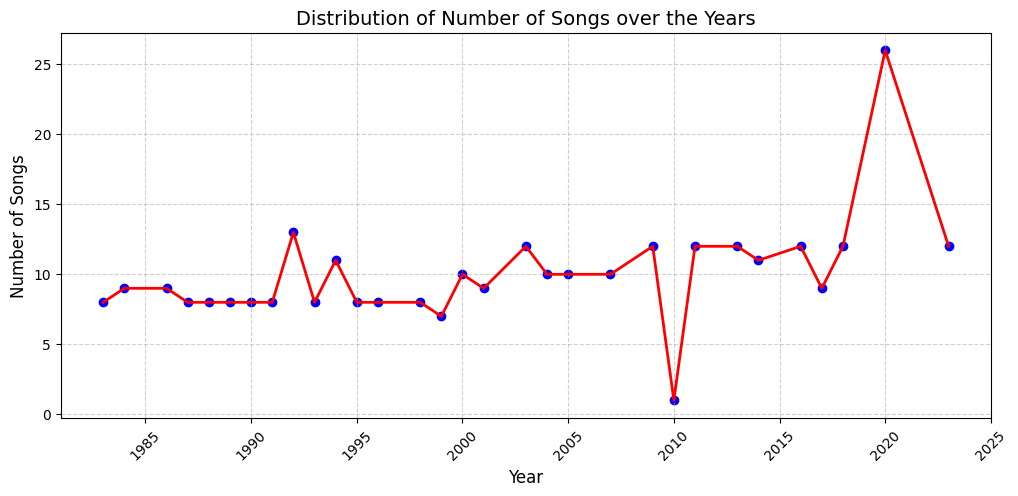

In [133]:
# Select distinct song-year pairs and count the number of songs per year
songs_freq = (songs_proc[['Year', 'Song']]
              .drop_duplicates()
              .groupby('Year', as_index=False)
              .agg(num_songs=('Song', 'count'))
              .sort_values(by=['Year']))

x = songs_freq['Year']
y = songs_freq['num_songs']

plt.figure(figsize=(12, 5))
# Create scatter plot
plt.scatter(x, y, color='blue', marker='o')
plt.plot(x, y, color='red', linestyle='-', linewidth=2)  # Line connecting points


# Add labels and title
plt.title("Distribution of Number of Songs over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Ensure the directory exists
os.makedirs("figures", exist_ok=True)

#save plot
plt.savefig("figures/songs_distribution.png", format="png", bbox_inches="tight")

# Show plot
plt.show()

In [134]:
# Period range
min_year = songs_proc['Year'].min()
max_year = songs_proc['Year'].max()

# Count unknown dates
unknown_dates = songs_proc['Year'].isna().sum()
total_songs = len(songs_proc)
unknown_pct = (unknown_dates / total_songs) * 100

# Count songs per decade
decade_counts = songs_proc['Decade'].value_counts().reindex(decade_order, fill_value=0)

# Print summary
print(f"Period of songs from: {int(min_year)} to {int(max_year)}")
print(f"Number of songs with unknown date: {unknown_dates} which is {unknown_pct:.2f}% of total songs.\n")

for decade, count in decade_counts.items():
    print(f"{decade}: {count} songs")

Period of songs from: 1983 to 2023
Number of songs with unknown date: 0 which is 0.00% of total songs.

Early 1980s: 17 songs
Late 1980s: 33 songs
Early 1990s: 48 songs
Late 1990s: 31 songs
Early 2000s: 41 songs
Late 2000s: 32 songs
Early 2010s: 36 songs
Late 2010s: 33 songs
Early 2020s: 38 songs


- As shown a in the plot, the 1990s and 2000s seem to have consistent song production.
- There are some high-output years where the number of songs significantly increases like in 2020 which is most likely where his top hits where created.
- A noticeable drop of song production in 2010 may be due to the circumstances of the country back then  


In [135]:
del songs_freq

## **Text Mining**

**Text mining** can also be thought of as text analytics. The goal is to discover relevant information that is possibly unknown or hidden in the text. **Natural Language Processing** (NLP) is one methodology that can be used in mining text. It tries to decipher the ambiguities 
and complications in written language by tokenization, clustering, extracting entity and word relationships, and using algorithms to identify themes and quantify subjective information. We will begin by breaking down the concept of **lexical complexity**.

Lexical complexity can be described by a combination of these measures: 
- Word frequency: number of words per song. 
- Word length: average length of individual words in the songs lyrics. 
- Lexical diversity: number of unique words used in the song vocabulary. 
- Lexical density: the number of unique words divided by the total number of words (word repetition).

### Studying word frequency

In music, individual word frequencies carry a great deal of significance, whether it be repetition or rarity. 

Both cases affect **memorability** of the entire song itself. One important goal of lyrics analysis, as well as for songwriter, is to know whether there is a *correlation between word frequency and hit songs*. So we take the tidy format one step further and get a summarized count of words per song.


Here we consider all words in the song's lyrics as opposed to just distinct words.


In [136]:
full_word_count = (songs_proc
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby("Song", as_index=False)
    .agg(num_words=('num_words', 'first'), Year=('Year', 'first'), 
         Composer=('Composer', 'first'), Lyricist=('Lyricist', 'first'))
    .sort_values(by="num_words", ascending=False)
)

In [137]:
# Select the top-most rows based on word count
full_word_count.head(15)

Song  num_words  Year          Composer            Lyricist
209              ليلة        307  1988        خليل مصطفى          محمد البنا
222              ماله        289  1986  عبد الرحيم شاهين    عبد الرحيم شاهين
189               قمر        252  1989      رياض الهمشري            عادل عمر
41     إيش حال الشجرة        250  1984        محمد الشيخ    عبد الرحيم منصور
101             حبيبي        244  1991         عمرو دياب         مجدي النجار
160       عصافير الحب        233  1984  سيف الدولة حمدان        عصام عبدالله
194           كده كده        224  1989      رياض الهمشري            محمد فضل
91               توبة        220  1988         عمرو دياب         مجدي النجار
247          مية مية         219  1986         عمرو دياب         مجدي النجار
113            خالصين        219  1987        خليل مصطفى            رضا أمين
31               إزيك        205  1988      إبراهيم فهمي            عادل عمر
273    ورجعت من السفر        203  1995   ياسر عبد الرحمن          مدحت العدل
28   أيس كريم في جليم        198  1992         عمرو دياب          مدحت العدل
265            و نندم        197  1990         عمرو دياب         مجدى النجار
226          مدي إيدك        196  1986              تراث  عبد الرحمن أبو سنة

In [138]:
# Select the bottom-most rows based on word count
full_word_count.tail(15)

Song  num_words  Year         Composer         Lyricist
264  هيعيش يفتكرني         67  2020       عمرو مصطفى        تامر حسين
155     عارف حبيبي         65  2011        عمرو دياب    أيمن بهجت قمر
272   وحیاتي خلیكي         65  2009      عمرو طنطاوي    عبد المنعم طه
277    وفهمت عينيك         63  2007       عمرو مصطفى         خالد تاج
71       باين حبيت         62  2018       عمرو مصطفى        تامر حسين
70      بالضحكة دي         62  2020     عزيز الشافعي     عزيز الشافعي
11     أشوف عينيكي         61  1984             تراث     عصام عبدالله
136     زي ما إنتي         60  2020     عزيز الشافعي     عزيز الشافعي
54    الله على حبك         56  2009       عمرو مصطفى      مجدي النجار
21          أنا حر         55  1992        عمرو دياب       مدحت العدل
102  حبيبي يا عمري         54  2003  بهاء الدين محمد          خالد عز
179   قالي الوداع          52  2003          خالد عز  بهاء الدين محمد
187           قلوب         52  1994        عمرو دياب       مدحت العدل
238          مكانك         46  2023        عمرو دياب        تامر حسين
201          لا لا         42  2016      عمرو طنطاوي        تامر حسين

Note that most of the longest songs of Amr Diab were created in the 80's by the Lyricist Magdy El Naggar.
This may be due to the fact that the 80s, music was primarily distributed via cassettes and vinyl records, where albums often had a few long songs rather than many short tracks or that many songs from that period relied heavily on orchestras and live performances, which naturally led to longer arrangements with instrumental interludes.

Also note that the shortest songs were created recently which shows that people today, especially younger listeners, have shorter attention spans due to social media and fast-paced digital content.

Now, for deeper analysis, we'll filter the songs from two different decades (the 1980s and the 2000s) and then calculate the total word count of the lyrics in each period, along with the average number of words per song.

In [139]:
# Ensure "Year" is treated as numeric
songs_proc["Year"] = pd.to_numeric(songs_proc["Year"], errors="coerce")

# Drop or fill missing values
songs_proc = songs_proc.dropna(subset=["Year"])  # Drop rows with missing years
songs_proc["Year"] = songs_proc["Year"].astype(int)  # Convert to integer

# Now, perform filtering
songs_80s = songs_proc[(songs_proc["Year"] >= 1980) & (songs_proc["Year"] <= 1989)]
lyrics_count_80s = songs_80s["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()

songs_2000s = songs_proc[(songs_proc["Year"] >= 2000) & (songs_proc["Year"] <= 2025)]
lyrics_count_2000 = songs_2000s["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())).sum()

# Print results
print(f"Number of songs in the 80's: {songs_80s['Song'].nunique()}")
print(f"Lyrics count in the 80's: {lyrics_count_80s} , average: {lyrics_count_80s/songs_80s['Song'].nunique():.2f} words per song\n")

print(f"Number of songs in the 2000's: {songs_2000s['Song'].nunique()}")
print(f"Lyrics count in the 2000's: {lyrics_count_2000} , average: {lyrics_count_2000/songs_2000s['Song'].nunique():.2f} words per song")


Number of songs in the 80's: 50
Lyrics count in the 80's: 8174 , average: 163.48 words per song

Number of songs in the 2000's: 180
Lyrics count in the 2000's: 19679 , average: 109.33 words per song


These numbers prove the difference in the listening habits between the people back in the 80's and people now.

### Studying word count distribution

Here we study the lyrics lengths over the whole career of Amr Diab. We show a histogram overlaid with kernel density curve for the distribution of lengths for songs. This can help in understanding the distribution of lyric lengths and whether most songs have shorter or longer lyrics.

In [140]:
lyrics_len_dist = (songs_proc[['Song', 'Lyrics']]
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby('Song', as_index=False)  # Keep 'Song' column
    .agg(num_words=('num_words', 'first'))  # Keep num_words
)

# Function to estimate mode using kernel density estimation 
def estimate_mode(x):
    kde = gaussian_kde(x)
    x_grid = np.linspace(min(x), max(x), 1000)
    return x_grid[np.argmax(kde(x_grid))]

# Compute statistics
mean_count = lyrics_len_dist['num_words'].mean()
median_count = lyrics_len_dist['num_words'].median()
mode_count = estimate_mode(lyrics_len_dist['num_words'])

# Print results
print(f"Mean: {mean_count:.2f}")
print(f"Median: {median_count:.2f}")
print(f"Mode (estimated): {mode_count:.2f}")

Mean: 123.06
Median: 116.00
Mode (estimated): 106.99


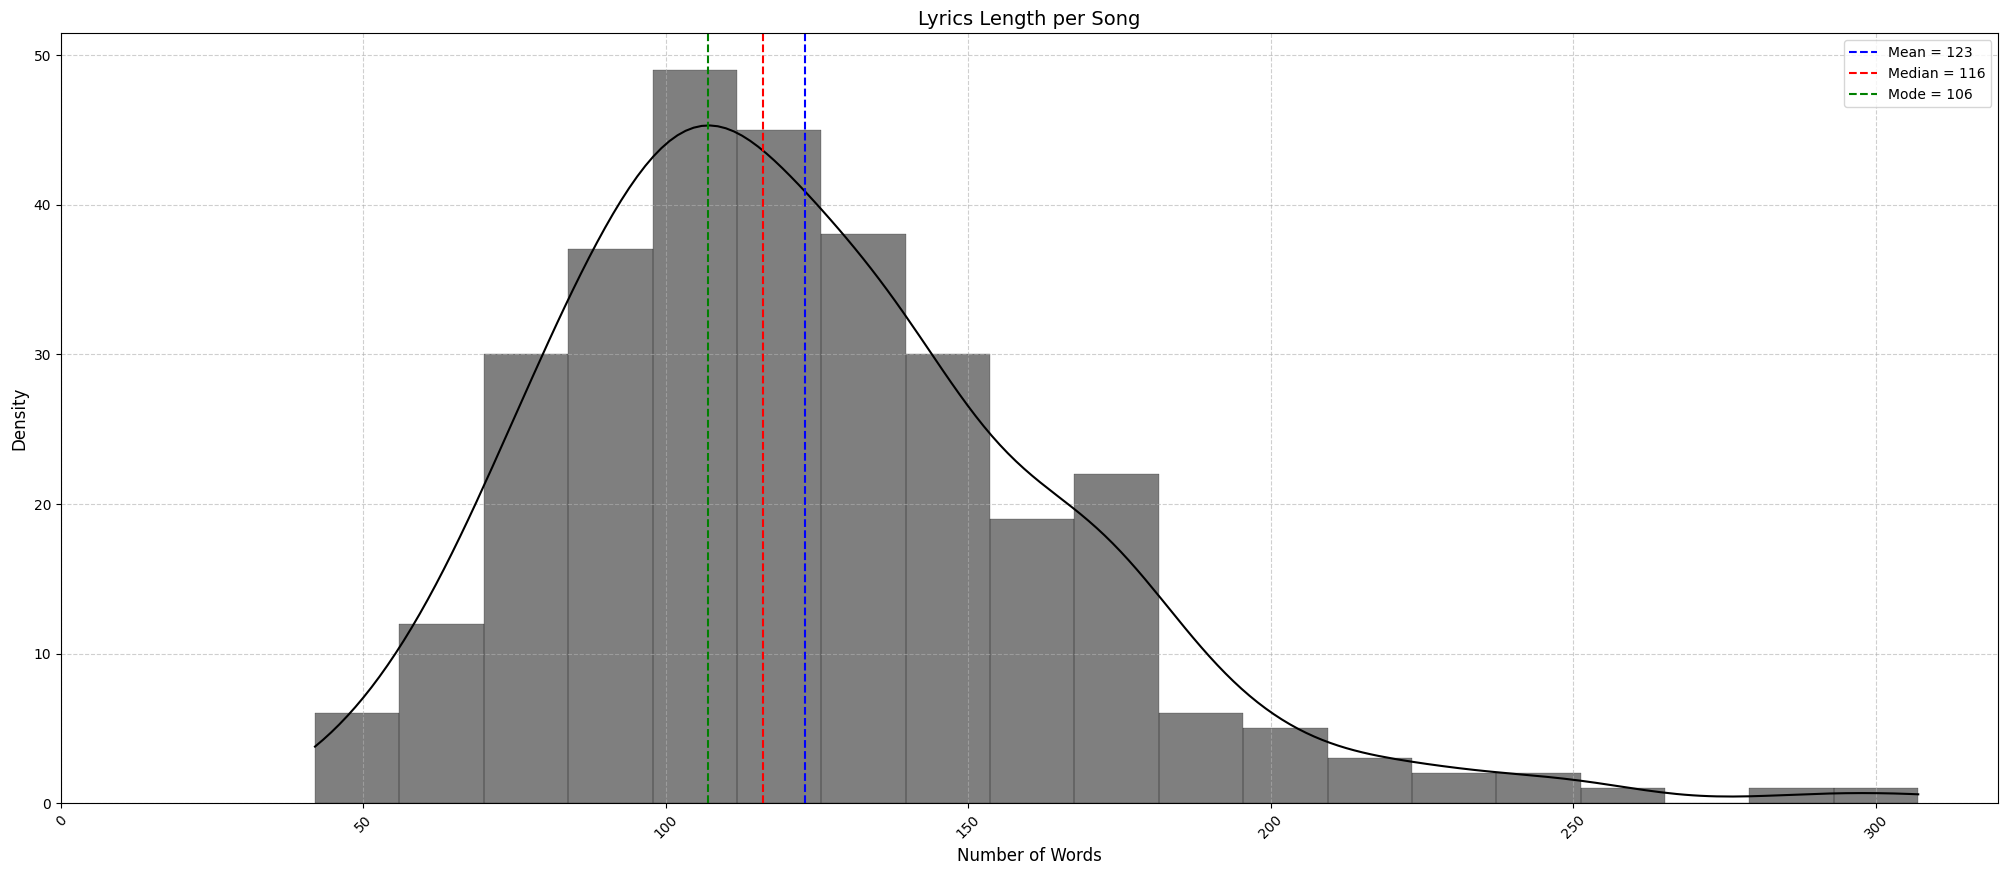

In [141]:
# Plot histogram with density
plt.figure(figsize=(25, 10))
sns.histplot(lyrics_len_dist["num_words"], kde=True, color="black", linewidth=0.15)

# Add vertical lines for mean, median, and mode
plt.axvline(mean_count, color="blue", linestyle="dashed", label=f"Mean = {int(mean_count)}")
plt.axvline(median_count, color="red", linestyle="dashed", label=f"Median = {int(median_count)}")
plt.axvline(mode_count, color="green", linestyle="dashed", label=f"Mode = {int(mode_count)}")

# Customize the plot
plt.title("Lyrics Length per Song", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(np.arange(0, max(lyrics_len_dist["num_words"]), 50), rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

- It is apparent from the figure that the average lyrics length per song is 123 words.  
- The most typical lyrics length is about 106 words (the mode). 
- Finally, the median is 116 words.
- Since Mean > Median > Mode, the lyrics length distribution **is likely skewed to the right**.
- This means that while most songs are short (~125 words), some longer songs (~200+ words) are stretching the average upward.

Estimation using right-skewed normal as well as normal distributions.


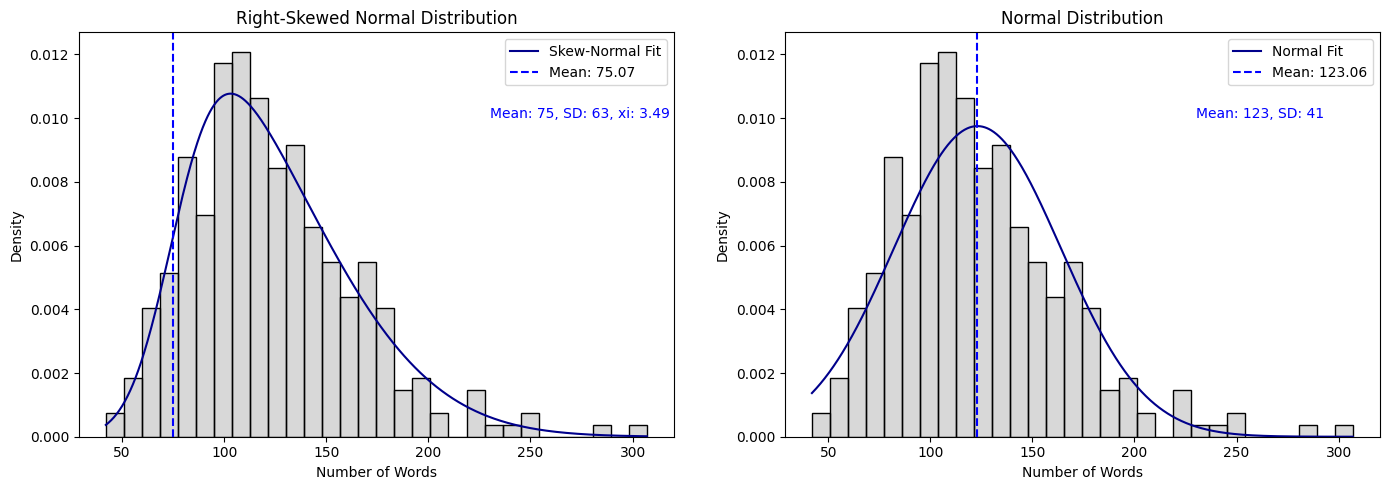

In [143]:
import scipy.stats as stats

# Assuming `lyrics_len_dist` DataFrame is available
num_words = lyrics_len_dist["num_words"]

# Fit to a normal distribution
normal_mean, normal_std = stats.norm.fit(num_words)  # Returns (mean, std)
 
# Fit to a right-skewed normal distribution
skew_xi, skew_mean, skew_std  = stats.skewnorm.fit(num_words)  # Returns (xi, mean, std)


# Function to generate density curves
x = np.linspace(num_words.min(), num_words.max(), 1000)
normal_pdf = stats.norm.pdf(x, loc=normal_mean, scale=normal_std)
skew_pdf = stats.skewnorm.pdf(x, skew_xi, loc=skew_mean, scale=skew_std)


# Plot Normal & Skewed Normal Distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Right-skewed normal distribution
sns.histplot(num_words, bins=30, kde=False, stat="density", color="gray", alpha=0.3, ax=axes[0])
axes[0].plot(x, skew_pdf, color="darkblue", label="Skew-Normal Fit")
axes[0].axvline(skew_mean, color="blue", linestyle="dashed", label=f"Mean: {skew_mean:.2f}")
axes[0].text(230, 0.01, f"Mean: {skew_mean:.0f}, SD: {skew_std:.0f}, xi: {skew_xi:.2f}", color="blue", fontsize=10)
axes[0].set_title("Right-Skewed Normal Distribution")
axes[0].set_xlabel("Number of Words")
axes[0].set_ylabel("Density")
axes[0].legend()

# Normal distribution
sns.histplot(num_words, bins=30, kde=False, stat="density", color="gray", alpha=0.3, ax=axes[1])
axes[1].plot(x, normal_pdf, color="darkblue", label="Normal Fit")
axes[1].axvline(normal_mean, color="blue", linestyle="dashed", label=f"Mean: {normal_mean:.2f}")
axes[1].text(230, 0.01, f"Mean: {normal_mean:.0f}, SD: {normal_std:.0f}", color="blue", fontsize=10)
axes[1].set_title("Normal Distribution")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()

plt.savefig("figures/lyrics_len_dist.png", dpi=1000, format="png", bbox_inches="tight")

plt.show()

It seems that right-skewed ditribution is better suited to fit the lyrics lengths data, as it was mentioned above.

In [144]:
# Remove variables from memory
del lyrics_len_dist

### Studying word count per decade


This is done to see if the timeline of the career of Amr Diab has an effect on the length of her songs. For each decade we plot a histogram of the lengths of lyrics the for songs performed through that decade.

In [145]:
# Group by Decade & Song, count words per song
full_word_count_decade = (songs_proc[['Song', 'Decade', 'Lyrics']]
    .assign(num_words=songs_proc["Lyrics"].apply(lambda lyrics: len(str(lyrics).split())))  # Count words
    .groupby(['Decade', 'Song'],as_index=False)  # Keep 'Decade' and 'Song' columns
    .agg(num_words=('num_words', 'first'))
)

In [146]:
# Finding the longest song
max_s = full_word_count_decade["num_words"].max()
longest_song = full_word_count_decade[full_word_count_decade["num_words"] == max_s]
print("Longest song:\n")
longest_song

Longest song:



Decade  Song  num_words
200  Late 1980s  ليلة        307

In [147]:
# Finding the shortest song 
min_s = full_word_count_decade["num_words"].min()
shortest_song = full_word_count_decade[full_word_count_decade["num_words"] == min_s]
print("Shortest song:\n")
shortest_song

Shortest song:



Decade   Song  num_words
299  Late 2010s  لا لا         42

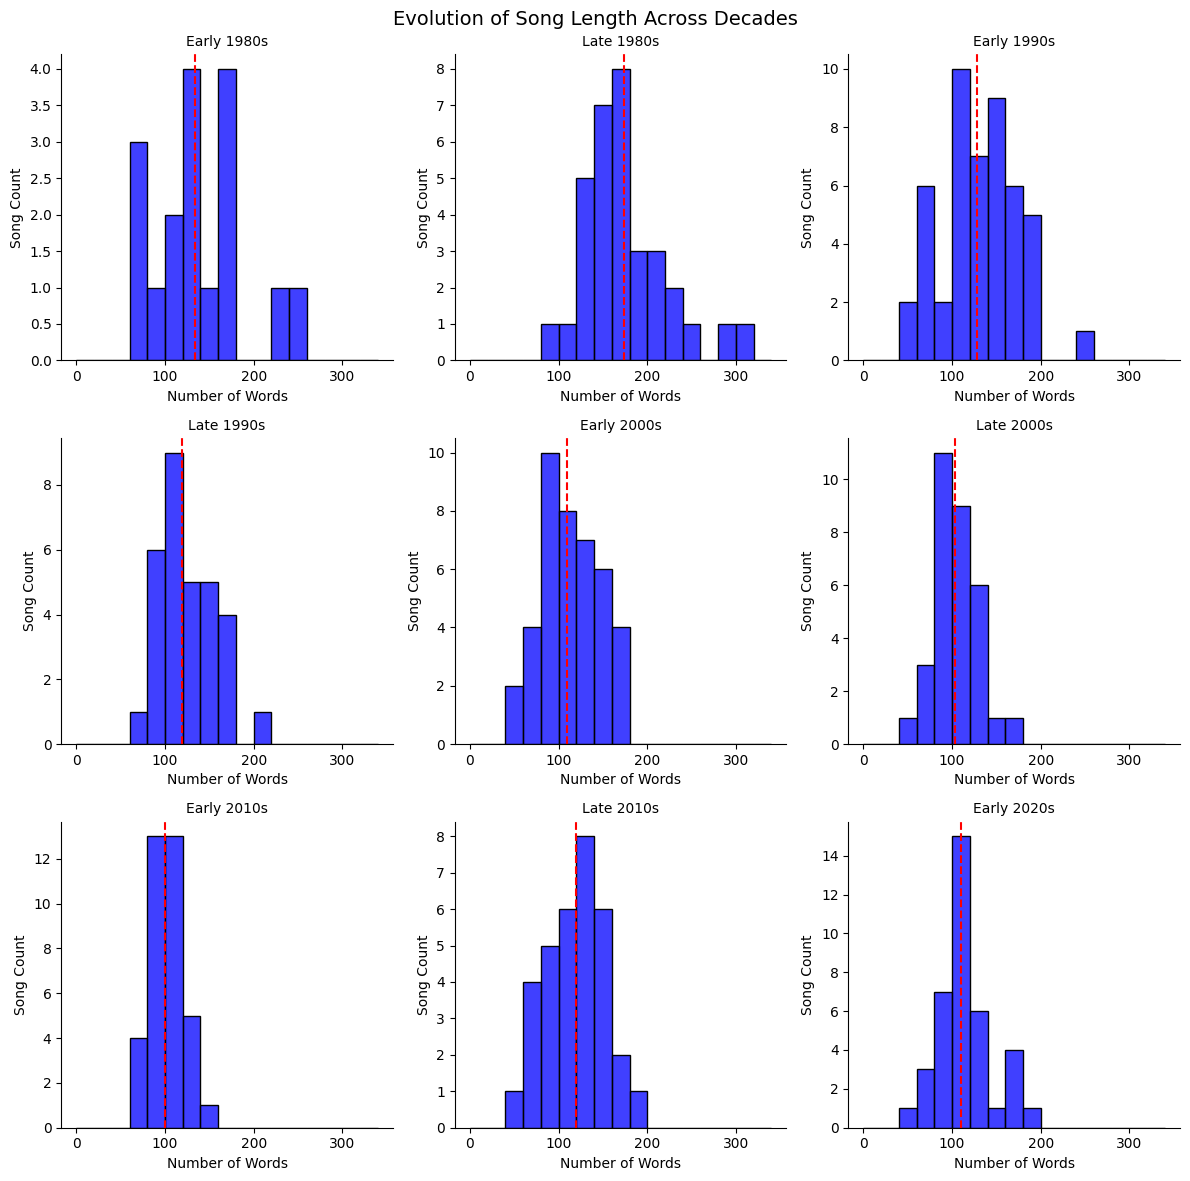

In [148]:
# Ensure 'Decade' is a categorical column with the correct order
decade_order = ['Early 1980s', 'Late 1980s', 'Early 1990s', 'Late 1990s', 'Early 2000s', 'Late 2000s','Early 2010s','Late 2010s',  'Early 2020s']
full_word_count_decade['Decade'] = pd.Categorical(full_word_count_decade['Decade'], categories=decade_order, ordered=True)

# Seaborn FacetGrid for faceting by Decade
g = sns.FacetGrid(full_word_count_decade, col="Decade", col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.histplot, x="num_words", bins=np.arange(0, full_word_count_decade["num_words"].max() + 50, 20), color="blue", edgecolor="black")

# Adjust plot styling
# Adjust horizontal and vertical spacing
g.fig.subplots_adjust(wspace=0.3, hspace=0.4)  

# Set labels for each subplot individually
for ax in g.axes.flatten():
    ax.set_xlabel("Number of Words")
    ax.set_ylabel("Song Count")

# Titles for each subplot
g.set_titles(col_template="{col_name}")  

# Overall title
plt.subplots_adjust(top=0.9)
plt.suptitle("Evolution of Song Length Across Decades", fontsize=14)

# Vertical line for the median
g.map_dataframe(lambda data, color: plt.axvline(data['num_words'].median(), color='red', linestyle='--'))

# Now save the figure
plt.savefig("figures/full_word_count_decade.png", dpi=1000, format="png")
plt.show()


Note that in the calculation of lyrics lengths, the lyrics were preprocessed and stopwords were removed. So the length only includes the significant informative words in the song. 

From the histograms above, we observe that the majority of Amr Diab's songs have a word count below 200. However, there is a noticeable shift in song length across different decades.

1980s: Early in his career, songs varied in length but generally remained within the 100–200 word range.

1990s: During his peak, songs became more structured, with a consistent pattern of word count clustering around 150–200 words. This period marks his dominance in the Arabic pop music scene, producing many of his most iconic songs.

2000s: This period marks the beginning of a gradual shift towards shorter songs. While some tracks still maintained the lyrical density of the previous decade, there was a noticeable move toward more concise compositions.

2010s & 2020s: A trend towards shorter songs is evident, with most songs falling under 150 words. This aligns with the global shift in music consumption, where shorter, more concise tracks perform better on streaming platforms.
Interestingly, the longest song in the dataset appears in the early 2000s, while the shortest song is from the 2020s—possibly reflecting the influence of modern streaming trends and audience preferences for more compact musical content.

This trend suggests that Amr Diab adapted his songwriting approach over time, starting with more lyrically rich compositions in the 1980s and 1990s, before gradually shifting towards shorter and more commercially optimized songs in recent years.

To further analyze this shift, we will examine how his album releases, lyrical themes, and music style evolved across different periods of his career.

### Popular Words

Here we'll do a simple evaluation of the most frequently used words in the full set of lyrics.

In [149]:
import pandas as pd
import ast  # More secure than eval()

# Convert 'Lyrics' from a string representation to actual lists safely
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return []
    return val # If it's already a list, return as is

# Check if Lyrics is already in list form to avoid re-processing, then apply the function to parse the lyrics
if not isinstance(songs_proc["Lyrics"].iloc[0], list):
    songs_proc["Lyrics"] = songs_proc["Lyrics"].apply(safe_eval)

# Flatten all words into a single list
all_words = [word for lyrics in songs_proc["Lyrics"] for word in lyrics]

# Create a DataFrame with word counts
top_words = (pd.DataFrame(all_words, columns=["Word"])
             ["Word"].value_counts()
             .reset_index(name="word_freq")
             .rename(columns={"index": "Word"})
             .nlargest(20, "word_freq")
             .reset_index(drop=True))

# Display results
top_words

Word  word_freq
0    حبيبي        770
1     قلبي        728
2     الله        352
3     ليله        289
4    والله        270
5     عمري        250
6   الدنيا        233
7     معاك        215
8      ليل        187
9     خلاص        180
10    ياما        170
11    بالي        149
12   عينيا        141
13    ماله        136
14     حبك        135
15    كلام        134
16     ليا        133
17   تعالي        133
18    سنين        133
19    حاجه        132

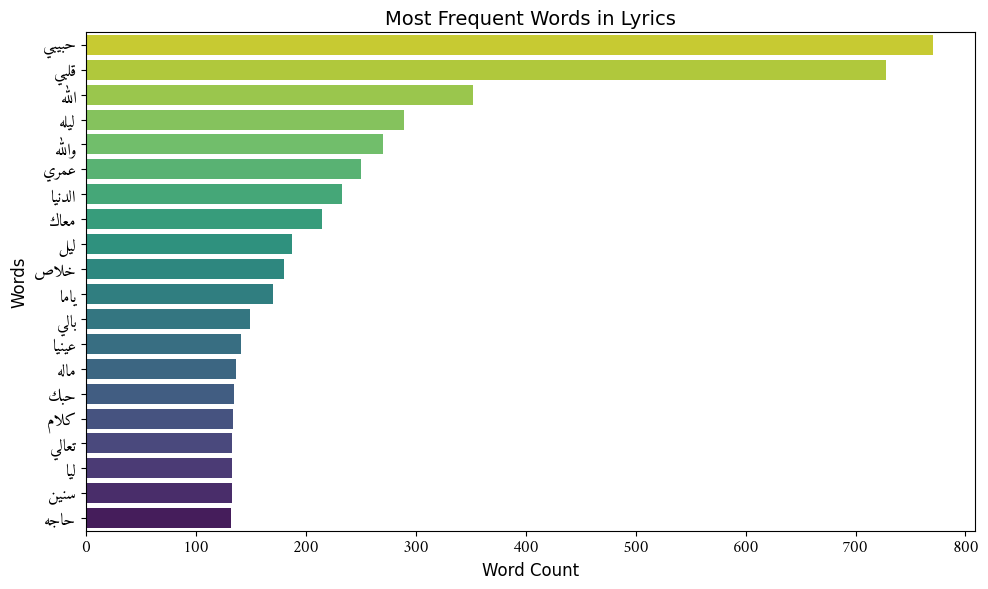

In [170]:
#%pip install arabic-reshaper python-bidi

import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.font_manager as fm

# Set up Arabic font
font_path = 'Fonts/Amiri-1/Amiri-Regular.ttf'
arabic_font = fm.FontProperties(fname=font_path, size=12)

def reshape_arabic(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# Reshape Arabic words for RTL
top_words["Word"] = top_words["Word"].apply(reshape_arabic)

# Sort ascending to plot most frequent on top
top_words = top_words.sort_values(by="word_freq", ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="word_freq", y="Word", data=top_words, hue="Word", palette="viridis", legend=False)
plt.title("Most Frequent Words in Lyrics", fontsize=14)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Words", fontsize=12)

# Apply Arabic font and right alignment
plt.xticks(fontproperties=arabic_font)
plt.yticks(fontproperties=arabic_font, ha='right')

# Invert to have most frequent words on top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/word_freq_barplot.png", dpi=1000, format="png", bbox_inches="tight")
plt.show()

The graph provides a clear visualization of the most frequently used words in Amr Diab's lyrics, emphasizing the strong romantic themes that characterize his music. The dominance of the word "حبيبي" (my love/my darling) aligns with his lyrical focus on love and emotional relationships, a recurring motif throughout his discography. Similarly, the appearance of words like "قلبي" (my heart) further reinforces this emotional tone, reflecting the intimate and affectionate language often used in his songs. The consistent use of such terms suggests that Amr Diab's music resonates deeply with listeners through its emphasis on love, longing, and personal connection, which may contribute to his broad and lasting appeal in the Arabic-speaking world.

In [166]:
#%pip install plotly

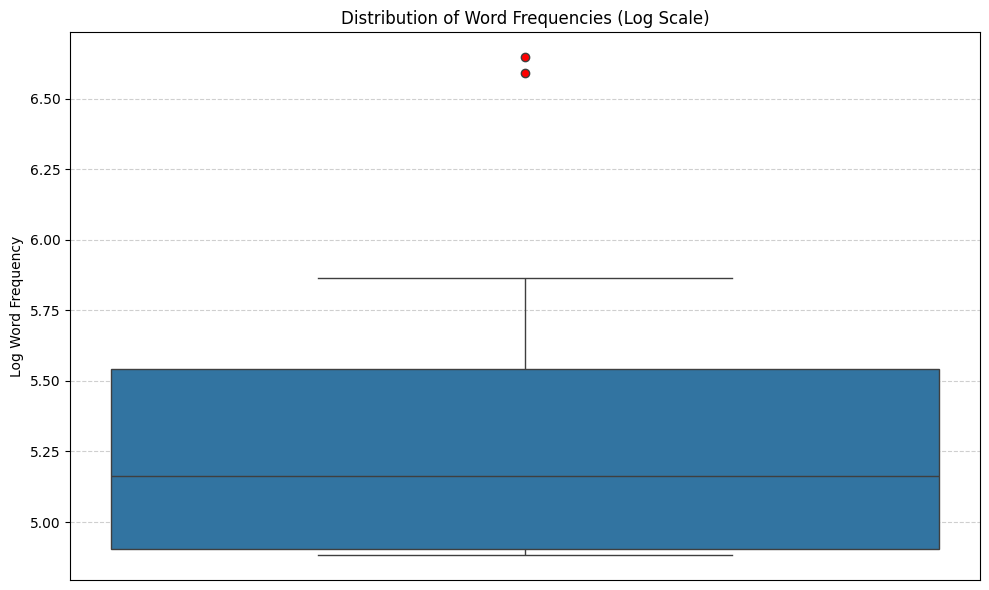

In [ ]:
# Import necessary libraries
import plotly.express as px
import plotly.graph_objects as go

# Create a boxplot of log-transformed word frequencies
plt.figure(figsize=(10, 6))

# Create DataFrame for boxplot
boxplot_data = pd.DataFrame({'word_freq': top_words['word_freq']})
boxplot_data['log_word_freq'] = np.log(boxplot_data['word_freq'])
boxplot_data['group'] = 1  # Single group for boxplot

# Create the boxplot
sns.boxplot(x='group', y='log_word_freq', data=boxplot_data, width=0.5,
            flierprops=dict(markerfacecolor='red', marker='o'))

# Add mean marker
mean_log_freq = boxplot_data['log_word_freq'].mean()
plt.scatter([0], [mean_log_freq], marker='^', color='blue', s=100, label='Mean')

# Customize appearance
plt.xlabel('')
plt.ylabel('Log Word Frequency')
plt.xticks([])  # Remove x-axis labels
plt.title('Distribution of Word Frequencies (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.6)

# Display or save the matplotlib figure
plt.tight_layout()
plt.savefig("figures/word_freq_boxplot.png", dpi=1000, format="png", bbox_inches="tight")
plt.show()

The quartile ranges of the log-transformed word frequencies further illuminate the distribution of Amr Diab’s most frequent words. The lower quartile (25th percentile) marks the point where roughly 25% of the words have a log-frequency value lower than approximately 4.9. The median (50th percentile) lies just above 5.1, indicating that half of the words have a log-frequency below this value, while the other half lies above it. The upper quartile (75th percentile) reaches up to around 5.8, showing that 75% of the words fall below this threshold, with a small number of words exhibiting higher frequencies.

The interquartile range (IQR), which is the difference between the 75th and 25th percentiles, spans from roughly 4.9 to 5.8. This range suggests that the majority of the words are clustered within this narrow band of log-frequency values. However, the presence of a few extreme outliers (around 6.6) drives the mild right skew, indicating that there are a few highly prominent words, such as “حبيبي,” that significantly differ from the majority in terms of frequency.

In summary, the quartile ranges confirm that most of Amr Diab’s frequently used words are concentrated in a tight central cluster, while a few words, such as "حبيبي," emerge as notable outliers with much higher frequency counts.

In [173]:
# Delete variables from memory
if 'top_words' in globals() or 'top_words' in locals():
    del top_words

if 'top_words_plot' in globals() or 'top_words_plot' in locals():
    del top_words.plot

## **Word cloud**

Word cloud is a *graphical* representation of words frequencies, where it gives greater prominence to words that appear more frequently.
Word clouds are insightful, visually engaging, and  present text data in a simple and clear format, that of a cloud in which the size of the words depends on some respective significance measaure (for example, frequency of occurrence).
As such, they are visually nice to look at as well as easy and quick to understand.
They are incredibly handy for anyone wishing to communicate a basic insight based on text data — whether it’s to analyse a speech, capture the conversation on social media or report on customer reviews.


In [239]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Helper: reshape & bidi-process an Arabic string
def reshape_word(word: str) -> str:
    reshaped = arabic_reshaper.reshape(word)
    return get_display(reshaped)

# Build a frequency dictionary from the lyrics DataFrame
def build_frequency_dict(df: pd.DataFrame, lyrics_col: str = "Lyrics") -> dict:

    # Tokenize each lyric string into words
    df["Words"] = df[lyrics_col].apply(lambda lst: lst if isinstance(lst, list) else [])

    # Flatten all tokens and count
    all_words = [w for words in df["Words"] for w in words]
    return pd.Series(all_words).value_counts().to_dict()

# Reshape keys for proper RTL rendering
def reshape_freq_dict(freq_dict: dict) -> dict:
    return {reshape_word(word): freq for word, freq in freq_dict.items()}

# Generate and display the word cloud
def plot_arabic_wordcloud(freq_dict: dict,
                          font_path: str,
                          width: int = 800,
                          height: int = 400,
                          bg_color: str = "black"):
    wc = WordCloud(
        font_path=font_path,
        width=width,
        height=height,
        background_color=bg_color,
        collocations=False
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("figures/word_cloud.png", dpi=1000, format="png", bbox_inches="tight")
    plt.show()


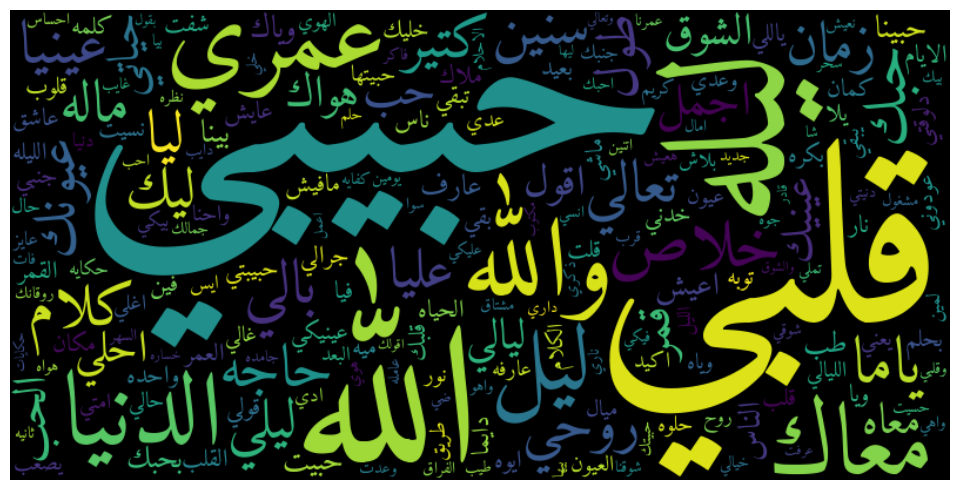

In [240]:
# Build raw frequencies
raw_freq = build_frequency_dict(songs_proc, lyrics_col="Lyrics")

# Reshape keys for RTL
reshaped_freq = reshape_freq_dict(raw_freq)

# Plot 
plot_arabic_wordcloud(
    reshaped_freq,
    font_path=font_path
)

The word cloud plot visually confirms the patterns we observed in the frequency analysis of the most common words in Amr Diab's lyrics. The larger words, such as "حبيبي" (my love) and its variants, dominate the plot, clearly illustrating their high frequency and central role in his music. Additionally, words like "قلبي" (my heart) further reinforce this notion, portraying the emotional depth and connection present in his music. This matches our earlier analysis, where we noted a few exceptionally frequent words that stood out from the rest.

In [186]:
del wordcloud

## **Popular Words per Decade**

So far we have studied the top words across all songs. What happens if we break them up by decade? Are some words more prevalent in songs that over certain decade(s)? These may be considered popular words by society with certain moods, political atmosphere, socioeconomic
context, etc.

In [224]:
import pandas as pd

total_words_per_decade = (songs_proc[['Decade', 'Lyrics']]  # Select relevant columns
                         .dropna()                      # Drop rows with missing lyrics
                         .assign(word_count=songs_proc['Lyrics'].apply(lambda x: len(str(x).split())))  # Count words in each song's lyrics
                         .groupby('Decade')             # Group by 'Decade'
                         .agg({'word_count': 'sum'})     # Sum the word counts per decade
                         .reset_index()                 # Convert the result back to a DataFrame
                         .rename(columns={'word_count': 'freq'})  # Rename the frequency column
)

# Display the result in tabular form
tab = total_words_per_decade.transpose()
tab.columns = tab.iloc[0] # Set the first row as column names
tab.iloc[1:2] 


Decade Early 1980s Early 1990s Early 2000s Early 2010s Early 2020s Late 1980s  \
freq          2393        6300        4611        3613        4323       5781   

Decade Late 1990s Late 2000s Late 2010s  
freq         3871       3289       3843

It’s clear that the early 1990s represent the zenith of Amr Diab’s output, with 6,300 total words spread across 48 songs, more than any other five-year window in his catalog. If you extend that burst forward into the early 2000s (which adds another 41 songs), this roughly ten-year stretch alone accounts for 89 tracks, or nearly 29% of his entire 309-song repertoire. Considering his career spans over 40 years (from 1983 to 2023), this concentrated decade of creativity truly stands out as his most prolific period.

Now, we're going to be analyzing the most frequent words in Amr Diab's lyrics across different decades. This analysis helps us identify which words were most prominent in his lyrics over time, giving insight into changing themes or lyrical styles.

In [225]:
import pandas as pd

no_of_tops = 10

# Split lyrics into individual words and create a new DataFrame with 'Decade' and 'Word'
songs_proc['Words'] = songs_proc['Lyrics'].apply(lambda x: str(x).split())  # Split lyrics into words

# Create a DataFrame with each word and its corresponding decade
words_data = songs_proc.explode('Words')[['Decade', 'Words']]

# Calculate the frequency of each word per decade
top_words_per_decade = (words_data.groupby(['Decade', 'Words'])
                        .size()  # Get the word frequency
                        .reset_index(name='freq')  # Convert the result to a DataFrame
                        .groupby('Decade')  # Group by Decade again
                        .apply(lambda x: x.nlargest(no_of_tops, 'freq'))  # Get top N words per decade
                        .reset_index(drop=True)  # Reset the index for clean output
                        .sort_values(by=['Decade', 'freq'], ascending=[True, False]))  # Sort by frequency within each decade

# Ensure proper column ordering
top_words_per_decade = top_words_per_decade[['Decade', 'freq', 'Words']]

# Display the result
top_words_per_decade

C:\Users\matef\AppData\Local\Temp\ipykernel_17800\2582861671.py:16: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Decade  freq      Words
0   Early 1980s    40    'الحب',
1   Early 1980s    39    'طريق',
2   Early 1980s    29   'بتغني',
3   Early 1980s    29    'لمين',
4   Early 1980s    28   'مصريه',
..          ...   ...        ...
85   Late 2010s    30   'تعالي',
86   Late 2010s    30      'شا',
87   Late 2010s    29    'ياما',
88   Late 2010s    27    'احلي',
89   Late 2010s    26  'الدنيا',

[90 rows x 3 columns]

In [226]:
import re
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import arabic_reshaper
from bidi.algorithm import get_display

# Configure Arabic font (Amiri)
arabic_font = FontProperties(fname="Fonts/Amiri-1/Amiri-Regular.ttf", size=12)

# Helper to reshape and bidi-process Arabic words
def reshape_word(word: str) -> str:
    reshaped = arabic_reshaper.reshape(word)
    return get_display(reshaped)

In [227]:
# Build and sort top words per decade
def get_top_words_per_decade(df: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:

    # Tokenize and explode
    df['Words'] = df['Lyrics'].apply(lambda x: str(x).split())
    words_data = df.explode('Words')[['Decade', 'Words']]

    # Frequency per decade
    top = (words_data.groupby(['Decade', 'Words'])
           .size()  # count
           .reset_index(name='freq')
           .groupby('Decade')
           .apply(lambda x: x.nlargest(top_n, 'freq'))
           .reset_index(drop=True)
           )

    # Extract numeric year and early/late
    top['year'] = top['Decade'].apply(lambda x: int(re.search(r'\d+', x).group()))
    top['part'] = top['Decade'].apply(lambda x: 0 if 'Early' in x else 1)

    # Order decades
    decade_order = ["Early 1980s", "Early 1990s", "Early 2000s", "Early 2010s", "Early 2020s",
                    "Late 1980s", "Late 1990s", "Late 2000s", "Late 2010s"]
    top['Decade'] = pd.Categorical(top['Decade'], categories=decade_order, ordered=True)
    
    # Sort
    top = top.sort_values(by=['Decade', 'freq'], ascending=[True, False])
    return top[['Decade', 'Words', 'freq']]

In [228]:
# Safe axis breaks
def safe_breaks(series: pd.Series) -> list:
    clean = series.dropna()
    if clean.empty:
        return [0, 1]
    maxv = clean.max()
    breaks = np.unique(np.floor(np.linspace(0, maxv * 1.1, 5)))
    return [int(b) for b in breaks]

In [229]:
# Plotting function with Arabic font
def plot_top_words_per_decade(df: pd.DataFrame):
    decades = df['Decade'].cat.categories
    n = len(decades)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(12, 24), sharex=False)
    if n == 1:
        axes = [axes]
    for ax, decade in zip(axes, decades):
        data = df[df['Decade'] == decade]
        if data.empty:
            ax.set_title(f"{decade}: No data", fontproperties=arabic_font)
            continue

        # Reshape words for display
        data = data.copy()
        data['Words_disp'] = data['Words'].apply(reshape_word)

        # Horizontal bar plot
        ax.barh(data['Words_disp'], data['freq'], color='skyblue')
        ax.set_title(reshape_word(decade))
        ax.set_yticks(range(len(data)))
        ax.set_yticklabels(data['Words_disp'], fontproperties=arabic_font, ha='right')
        ax.set_xticks(safe_breaks(data['freq']))
        ax.grid(axis='x', linestyle='--', alpha=0.6)
        ax.barh(data['Words_disp'], data['freq'], color='skyblue')
        ax.invert_yaxis()

    plt.tight_layout()
    plt.savefig("figures/top_words_per_decade.png", dpi=1000, format="png", bbox_inches="tight")
    plt.show()

C:\Users\matef\AppData\Local\Temp\ipykernel_17800\3548668872.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



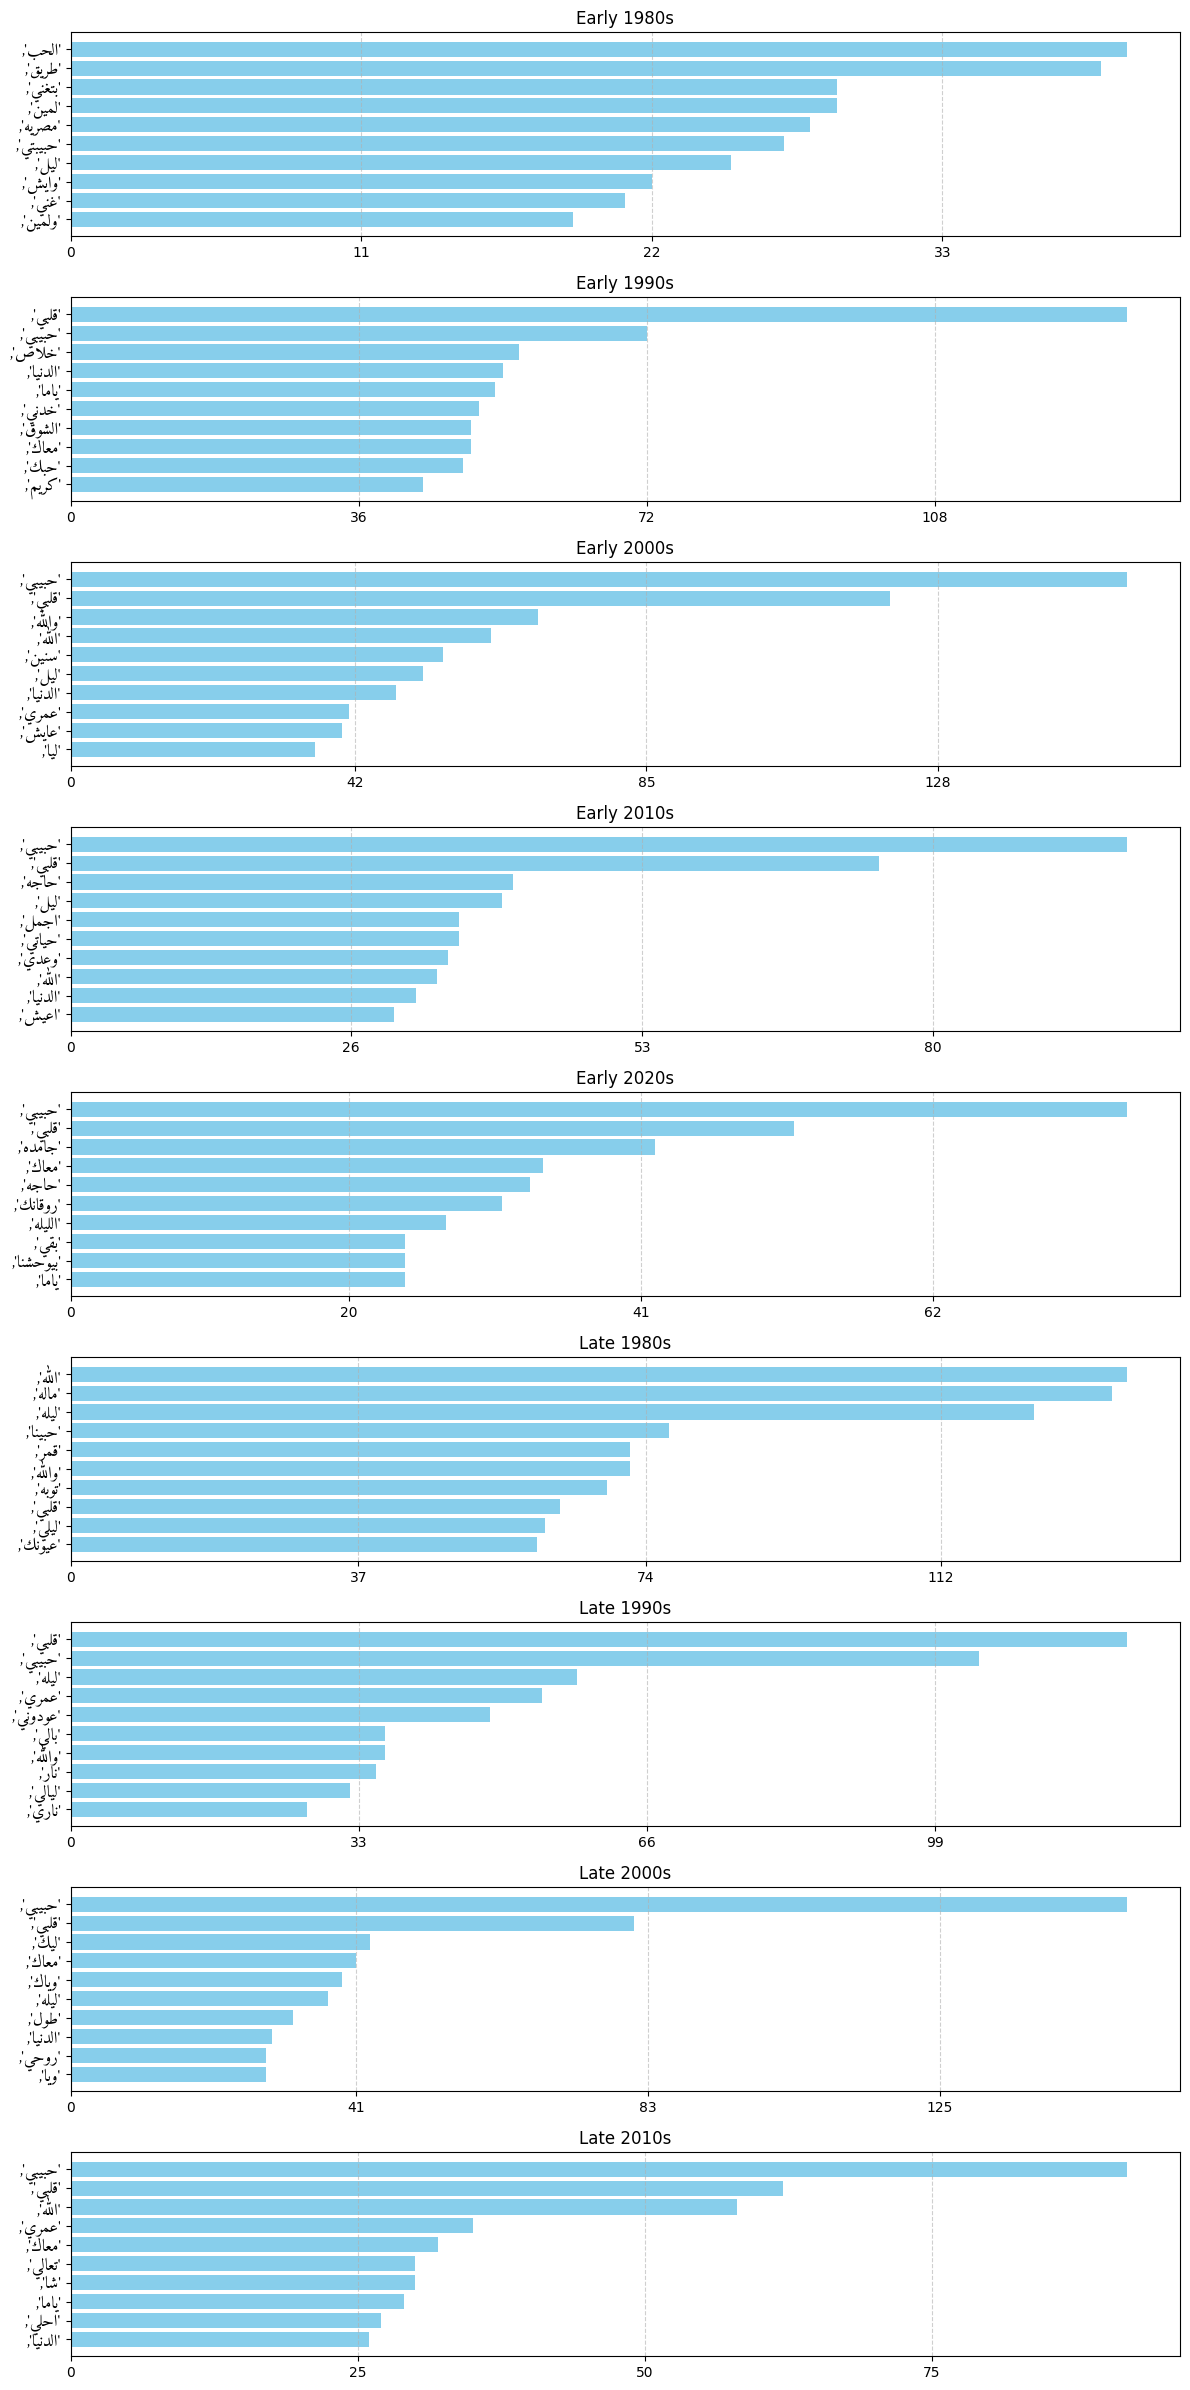

In [230]:
# Plotting
top_words_per_decade = get_top_words_per_decade(songs_proc, top_n=10)
plot_top_words_per_decade(top_words_per_decade)

In [ ]:
del top_words_per_decade
del top_words_per_decade_plot

## **Word length**

Word length is an interesting topic for lyricists. The longer the word, the harder it is to rhyme and squeeze into a pattern. Below we show a histogram of word lengths, that is overlaied with a Gaussian fitting curve.

In [261]:
# Split lyrics into individual words 
songs_proc['Words'] = songs_proc['Lyrics'].apply(lambda x: str(x).split())  # Tokenize the lyrics

# Now, explode the DataFrame to get each word in a separate row
words_data = songs_proc.explode('Words')[['Song', 'Decade', 'Words']]  # Explode the list of words into rows

# Create a new column 'word_len' with the length of each word
words_data['word_len'] = words_data['Words'].apply(len)

# Count the occurrences of each word length, sorted in descending order
word_length_counts = words_data['word_len'].value_counts().reset_index()

# Rename columns for clarity
word_length_counts.columns = ['word_len', 'count']

# Display the result
word_length_counts


word_len  count
0         7  13840
1         8  10853
2         9   5796
3         6   4124
4        10   2227
5        11    550
6         5    528
7        12    101
8        13      5

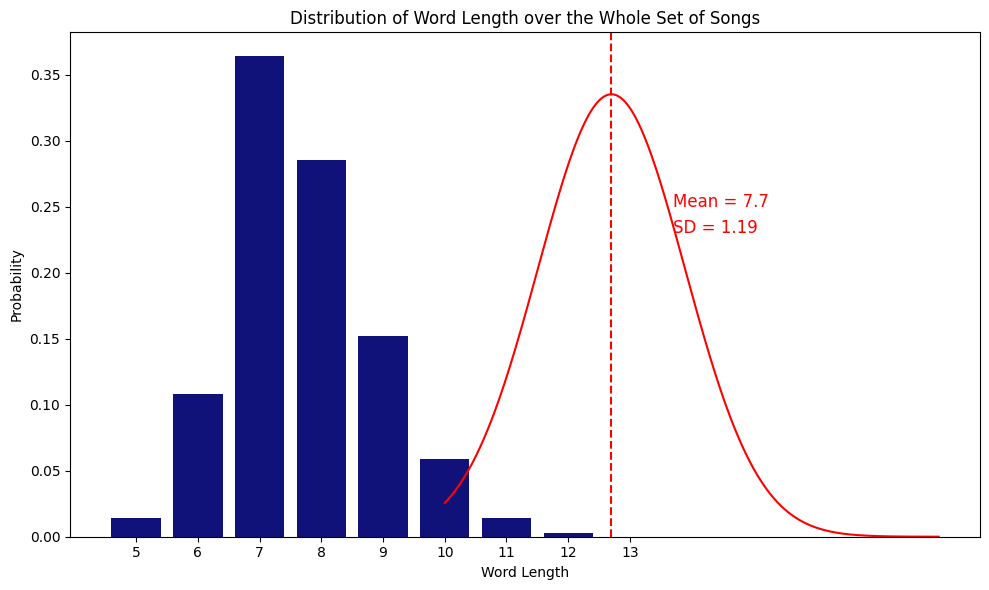

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

words_data = words_data.dropna(subset=['word_len'])  # Drop any NaN values in 'word_len'

# Calculate probability
word_length_counts = words_data['word_len'].value_counts().reset_index()
word_length_counts.columns = ['word_len', 'n']
word_length_counts['prob'] = word_length_counts['n'] / word_length_counts['n'].sum()

# Estimate mean
est_mean = round(np.sum(word_length_counts['prob'] * word_length_counts['word_len']), 2)

# Estimate variance and standard deviation
t1 = np.sum(word_length_counts['prob'] * (word_length_counts['word_len'])**2)
t2 = est_mean**2
est_var = t1 - t2
est_sd = round(np.sqrt(est_var), 2)

# Plotting the distribution of word length
plt.figure(figsize=(10, 6))

# Plot the bar chart of word length probabilities
sns.barplot(x='word_len', y='prob', data=word_length_counts, color='darkblue', errorbar=None)

# Add the normal distribution curve
x_values = np.linspace(min(word_length_counts['word_len']), max(word_length_counts['word_len']), 1000)
y_values = norm.pdf(x_values, loc=est_mean, scale=est_sd)
plt.plot(x_values, y_values, color='red', label=f'Normal Distribution (mean={est_mean}, sd={est_sd})')

# Plot the mean line
plt.axvline(est_mean, color='red', linestyle='--')
plt.text(est_mean + 1, 0.25, f'Mean = {est_mean}', color='red', ha='left', fontsize=12)

# Plot the standard deviation line
plt.text(est_mean + 1, 0.23, f'SD = {est_sd}', color='red', ha='left', fontsize=12)

# Set labels and title
plt.xlabel('Word Length')
plt.ylabel('Probability')
plt.title('Distribution of Word Length over the Whole Set of Songs')

# Show and save the plot
plt.tight_layout()
plt.savefig('figures/word_length_plot.png', dpi=1000, format='png')
plt.show()

The distribution of word lengths in Amr Diab's lyrics reveals an interesting pattern that is consistent with the more modern and accessible style of his music. The concentration of word lengths around 7.7 characters suggests that his lyrics tend to favor medium-length words, which is typical of many pop songs that aim for a balance between simplicity and depth. With a relatively narrow spread (SD = 1.19), the consistency in word length shows a focus on lyrical clarity and ease of listening.

This characteristic could be linked to the nature of pop music, where the rhythm, melody, and accessibility of the lyrics are important. The use of shorter words also likely serves to make the songs more memorable and easier for audiences to engage with, especially in a fast-paced pop music environment.

Considering the broader context of Amr Diab's career, this word length pattern aligns with his style of modern pop that is in tune with contemporary rhythms and melodies, offering a contrast to the more traditional, verbose lyricism in earlier Egyptian music genres. This could reflect a shift towards a more globalized style of pop music and may also coincide with social and political changes, where music and lyrics became more concise and direct to reach a wider audience.

### Word Cloud for the Longest Words

Next, we'll show the word cloud only for only a subset of the whole set of words (the largest words).

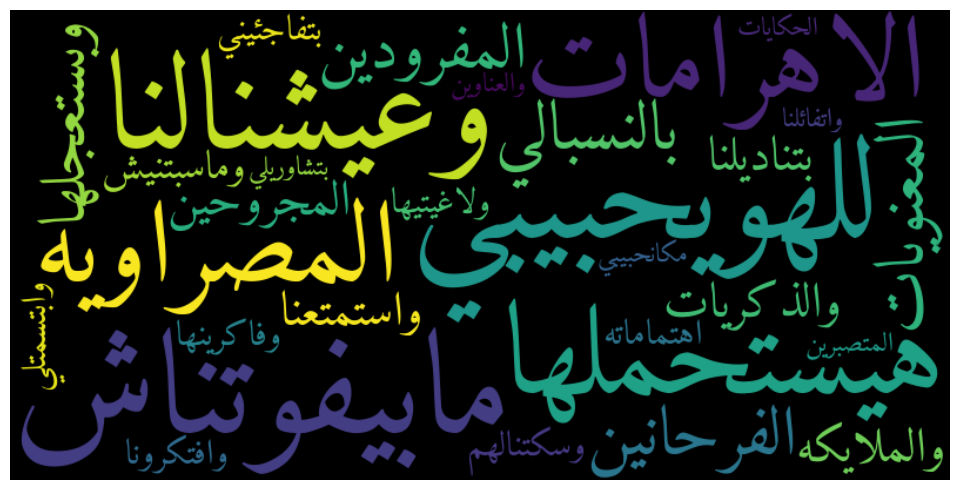

In [ ]:
# Build raw frequency dict (just to get the unique word list)
raw_freq = build_frequency_dict(songs_proc, lyrics_col="Lyrics")

# Sort words by length (descending) and take the top N
N = 30
longest_words = sorted(raw_freq.keys(), key=lambda w: len(w), reverse=True)[:N]

# Build a “length” dictionary and reshape for RTL
longest_len_dict = {
    reshape_word(w): len(w)
    for w in longest_words
}

# Generate and display the word cloud
def plot_arabic_wordcloud(freq_dict: dict,
                          font_path: str,
                          width: int = 800,
                          height: int = 400,
                          bg_color: str = "black",
                          save_path: str = "figures/longest_words_wordcloud.png"):
    wc = WordCloud(
        font_path=font_path,
        width=width,
        height=height,
        background_color=bg_color,
        collocations=False
    ).generate_from_frequencies(freq_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()

    # Save the word cloud to the specified file path
    plt.savefig(save_path, dpi=1000, format="png", bbox_inches="tight")
    plt.show()

# Plot and save the word cloud for longest words
plot_arabic_wordcloud(
    longest_len_dict,
    font_path="Fonts/Amiri-1/Amiri-Regular.ttf",
    save_path="figures/longest_words_wordcloud.png" 
)

### World Cloud for the Shortest Words

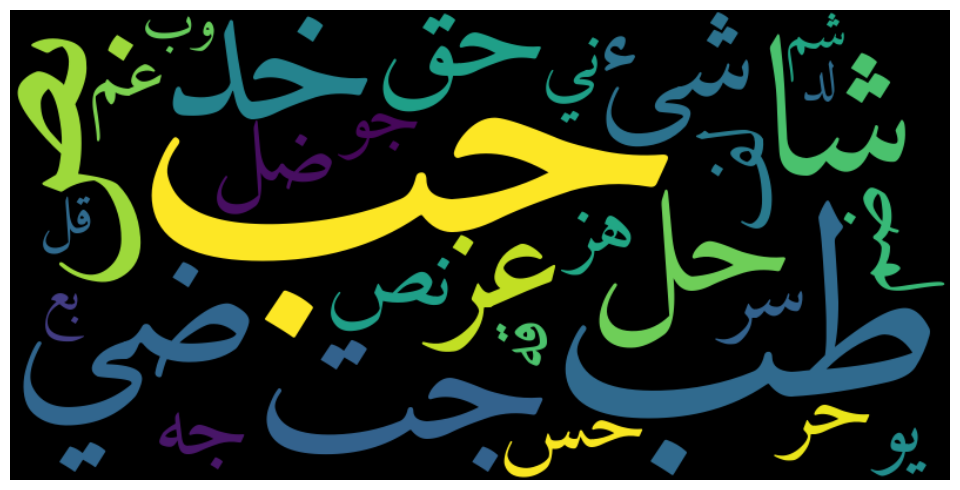

In [242]:
# Build raw frequency dict (to get all unique words)
raw_freq = build_frequency_dict(songs_proc, lyrics_col="Lyrics")

# Sort words by length (ascending) and take the shortest N
N = 30
shortest_words = sorted(raw_freq.keys(), key=lambda w: len(w))[:N]

# Build a dictionary mapping reshaped words to their lengths
shortest_len_dict = {
    reshape_word(w): len(w)
    for w in shortest_words
}

# Reuse the same plotting function, just change the save path
plot_arabic_wordcloud(
    shortest_len_dict,
    font_path="Fonts/Amiri-1/Amiri-Regular.ttf",
    save_path="figures/shortest_words_wordcloud.png"
)

### Word Cloud for Typical Lengths

In [245]:
# Count the occurrences of each word length
word_length_counts = words_data['word_len'].value_counts().reset_index()
word_length_counts.columns = ['word_len', 'count']
word_length_counts

word_len  count
0         7  13840
1         8  10853
2         9   5796
3         6   4124
4        10   2227
5        11    550
6         5    528
7        12    101
8        13      5

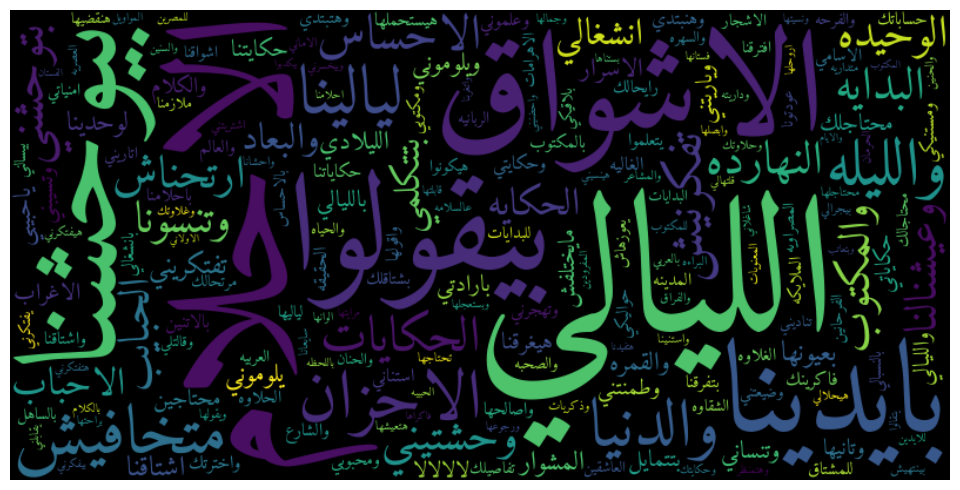

In [ ]:
# Get the top 3 most frequent word lengths (7, 8, 9)
N = 3
top_lengths = word_length_counts.sort_values('count', ascending=False).head(N)['word_len'].tolist()

# Filter the words in those typical lengths
typical_words = [word for word in raw_freq if len(word) in top_lengths]

# Build the frequency dictionary only for words with typical lengths
typical_freq_dict = {
    reshape_word(word): raw_freq[word]
    for word in typical_words
}

# Plot and save the word cloud for the most typical word lengths
plot_arabic_wordcloud(
    typical_freq_dict,
    font_path="Fonts/Amiri-1/Amiri-Regular.ttf",
    save_path="figures/typical_word_lengths_wordcloud.png"
)

In [246]:
del word_len_cloud

### Distribution of Word Length per Song per Decade

In [275]:
# Filter only the relevant columns
word_length_per_decade = songs_proc[['Decade', 'Lyrics']].dropna()

# Ensure lyrics are in list form 
word_length_per_decade['Words'] = word_length_per_decade['Lyrics'].apply(lambda x: x if isinstance(x, list) else [])

# Compute average word length per song
word_length_per_decade['avg_word_len'] = word_length_per_decade['Words'].apply(
    lambda words: sum(len(w) for w in words) / len(words) if words else 0
)

# Define order of decades
decade_order = [
    "Early 1980s", "Late 1980s",
    "Early 1990s", "Late 1990s",
    "Early 2000s", "Late 2000s",
    "Early 2010s", "Late 2010s",
    "Early 2020s"
]

# Cast 'Decade' to a categorical with that order
word_length_per_decade['Decade'] = pd.Categorical(
    word_length_per_decade['Decade'],
    categories=decade_order,
    ordered=True
)

# Now sort by the decade
word_length_per_decade = word_length_per_decade.sort_values('Decade')

# Display result
word_length_per_decade[['Decade', 'avg_word_len']]


Decade  avg_word_len
308  Early 1980s      5.111940
307  Early 1980s      4.633588
294  Early 1980s      5.086614
293  Early 1980s      4.719424
292  Early 1980s      5.131148
..           ...           ...
177  Early 2020s      4.384615
83   Early 2020s      4.692308
84   Early 2020s      4.454545
183  Early 2020s      5.020979
0    Early 2020s      5.058824

[309 rows x 2 columns]

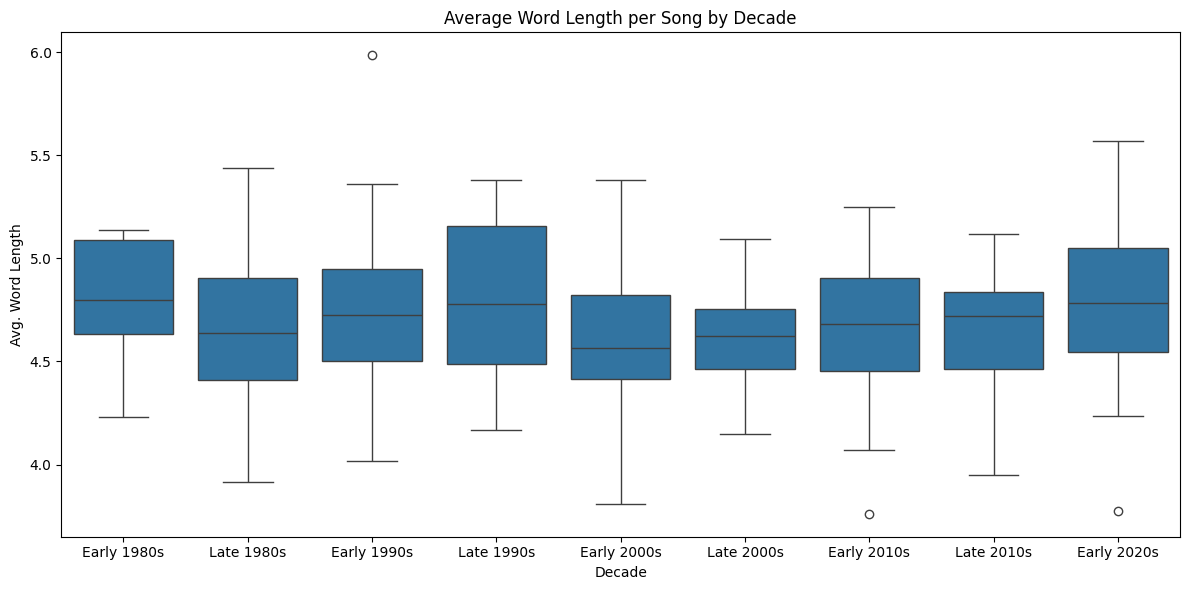

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot average word length per decade
sns.boxplot(data=word_length_per_decade, x='Decade', y='avg_word_len')
plt.title("Average Word Length per Song by Decade")
plt.ylabel("Avg. Word Length")
plt.xlabel("Decade")
plt.tight_layout()
plt.savefig("figures/av_word_length_per_decade.png", dpi=1000, format="png", bbox_inches="tight")
plt.show()

This boxplot illustrates the average word length per song across different decades of Amr Diab's discography, from the early 1980s through the early 2020s. Overall, the average word length has remained relatively consistent, generally falling between 4.5 and 5 characters. There are slight fluctuations, for instance, songs from the early 1980s and late 1990s show a slightly higher median word length compared to other periods. Notably, there are some outliers, such as a particularly short average in the early 2000s and early 2020s, and a high outlier in the early 1990s. This suggests that while Amr Diab’s lyrical style has evolved, the complexity of his word choice in terms of length has remained stable, reflecting a consistent lyrical approach throughout his career.

### Probability Density Function (PDF) for Word Lengths per Decade

Next, we'll plot a Probability Density Function (PDF) plot that shows how the average word length per song is distributed across different decades in Amr Diab’s discography. Each curve represents a normal distribution (bell-shaped curve) fitted to the average word lengths of songs within a given decade.

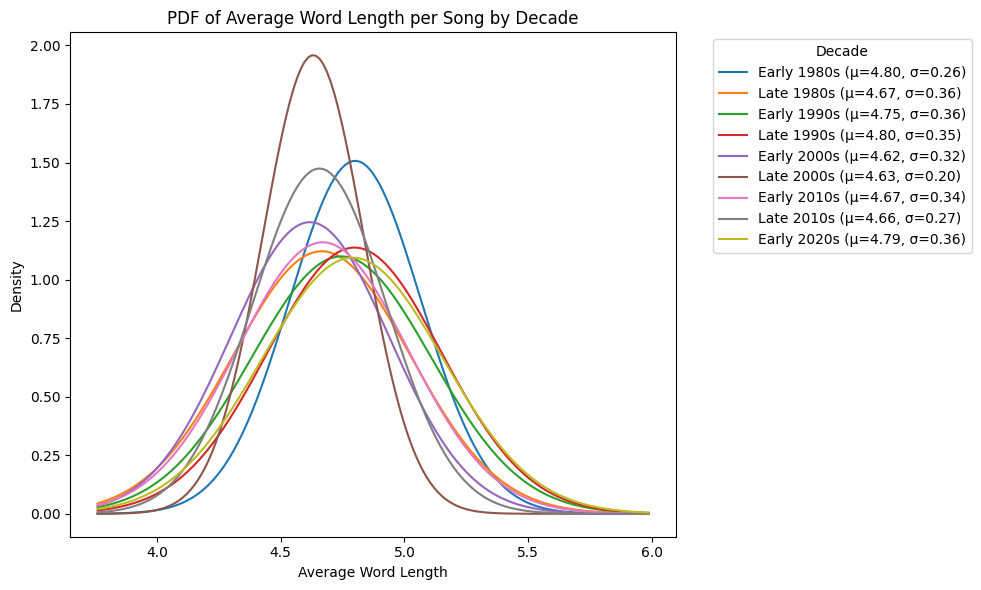

In [278]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define a grid spanning the range of average word lengths
grid = np.linspace(
    word_length_per_decade['avg_word_len'].min(),
    word_length_per_decade['avg_word_len'].max(),
    150
)

# Plot the PDF for each decade
plt.figure(figsize=(10, 6))

for decade, group in word_length_per_decade.groupby('Decade', observed=True):
    mu   = group['avg_word_len'].mean()
    sigma= group['avg_word_len'].std()
    pdf  = stats.norm.pdf(grid, loc=mu, scale=sigma)
    plt.plot(grid, pdf, label=f"{decade} (μ={mu:.2f}, σ={sigma:.2f})")

# Finalize the plot
plt.title("PDF of Average Word Length per Song by Decade")
plt.xlabel("Average Word Length")
plt.ylabel("Density")
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("figures/PDF_av_word_len_per_decade.png", format="png", dpi=1000)
plt.show()


- The x-axis shows the range of average word lengths (in characters).
- The y-axis shows the density, which reflects how likely a given word length is within that decade.
- Each colored curve corresponds to a different decade with its own:
    - Mean (μ) = the average word length for that decade.
    - Standard deviation (σ) = how much variation exists in word lengths for that decade.

The graph suggests that although there are slight decade-by-decade shifts in word length (some becoming more uniform or slightly shorter/longer), Amr Diab's lyrical style has remained fairly stable in terms of average word length over time.

In [279]:
# Delete the variables
del word_length_per_decade

##  **Lexical diversity**

The more varied vocabulary a text possesses, the higher its **lexical diversity**. Song vocabulary can be seen as a representation of how many unique words are used in a song. This can be shown with a simple graph of the average unique words per song over the decades/years.

In [77]:
import pandas as pd

# Assuming 'songs_proc' is your DataFrame and it has a 'Lyrics' column
# Let's first split the 'Lyrics' into words, then calculate lexical diversity

# Remove rows where 'Decade' or 'Year' are missing
lex_diversity_per_year = songs_proc.dropna(subset=['Decade', 'Year'])

# Split 'Lyrics' into words and calculate unique word count per song and year
lex_diversity_per_year['word_count'] = lex_diversity_per_year['Lyrics'].apply(lambda x: len(set(str(x).split())))

# Group by 'Song' and 'Year', then get the unique word count per group
lex_diversity_per_year = lex_diversity_per_year.groupby(['Song', 'Year'])['word_count'] \
    .sum() \
    .reset_index(name='lex_diversity') \
    .sort_values(by='lex_diversity', ascending=False)

# Show the first few rows
lex_diversity_per_year.head()


Song  Year  lex_diversity
130  رصيف نمرة خمسة  1992            108
231           مصرية  1984             88
7       أحضان الجبل  1983             87
175     فاكرني ياحب  2020             87
307        يوم تلات  2020             82

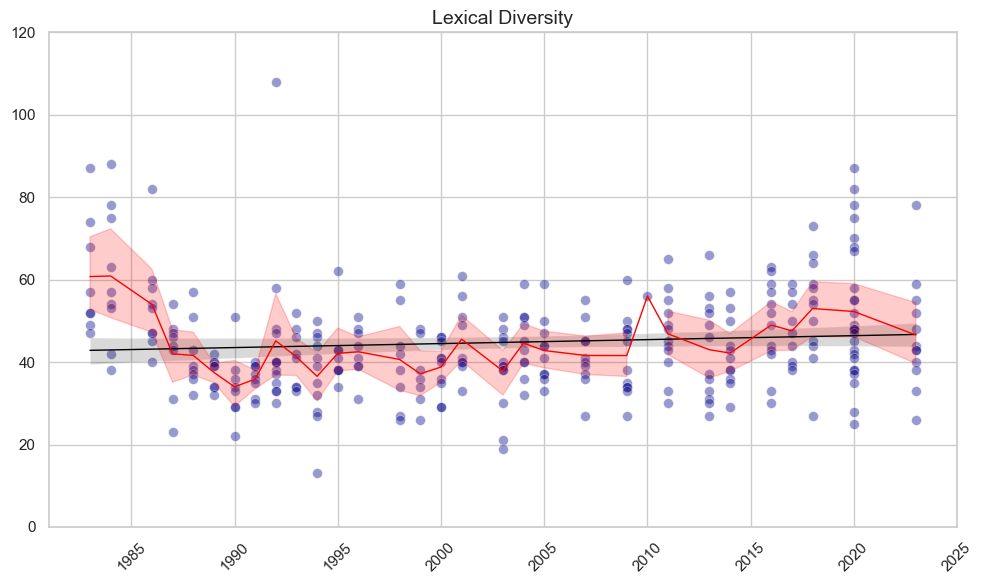

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(
    data=lex_diversity_per_year,
    x="Year", y="lex_diversity",
    color='darkblue',
    alpha=0.4,
    s=50  # size of the points
)

# Adding linear smooth line (with confidence intervals)
sns.regplot(
    data=lex_diversity_per_year,
    x="Year", y="lex_diversity",
    scatter=False,
    color='black',
    line_kws={"color": "black", "lw": 1}
)

# Adding second smooth line (using lineplot for a second line)
sns.lineplot(
    data=lex_diversity_per_year,
    x="Year", y="lex_diversity",
    color='red',
    lw=1
)

# Customize the plot
plt.title('Lexical Diversity', fontsize=14, ha='center')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(range(0, lex_diversity_per_year['lex_diversity'].max() + 20, 20))
plt.tight_layout()

# Save the plot with 1000 dpi
plt.savefig('figures/lex_diversity_per_year.png', dpi=1000, format='png')

# Show the plot
plt.show()


Consistency in Lexical Diversity: The scatter plot shows that lexical diversity remains relatively stable across years, with most songs having a lexical diversity score around 40 to 50. This suggests that the average number of unique words used in song lyrics has not drastically changed over time.

Outliers in Recent Years: In the later years (around 2015 to 2020), there are a few songs with significantly higher lexical diversity. These outliers could indicate some newer songs that use a larger vocabulary, perhaps due to changing trends in songwriting, more diverse or complex lyrics, or different genre influences.

Trend Line: The red trend line shows a slight increase in lexical diversity over the years. This suggests that while the diversity remains relatively constant, there is a slow upward trend indicating a gradual increase in the complexity of the lyrics.

In order to have better visualization of lexical diversity, we redraw it after removing anomalous songs, that is, songs that are either too long or too short. We consider $100$ as a threshold for large anomalies and $10$ as the threshold for small anomalies. That is,
we only keep songs with lexical diversity between $10$ and $100$

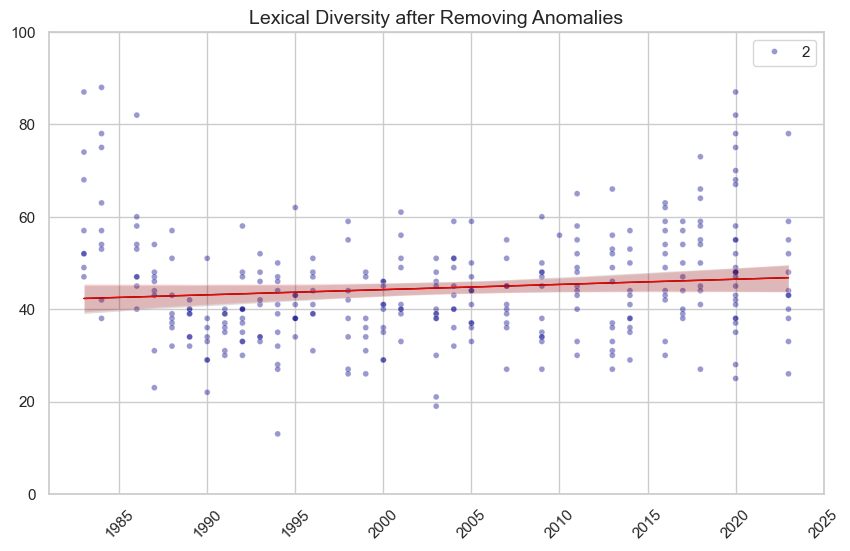

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming lex_diversity_per_year is your DataFrame
# Filter data where lex_diversity is between 10 and 100
lex_diversity_per_year_2 = lex_diversity_per_year[(lex_diversity_per_year['lex_diversity'] < 100) & (lex_diversity_per_year['lex_diversity'] > 10)]

# Set seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Create the plot
lex_diversity_per_year_plot_2 = sns.scatterplot(
    data=lex_diversity_per_year_2,
    x="Year", y="lex_diversity",
    color='darkblue',
    alpha=0.4,
    size=2
)

# Adding linear smooth line (with confidence intervals)
sns.regplot(
    data=lex_diversity_per_year_2,
    x="Year", y="lex_diversity",
    scatter=False,
    color='black',
    line_kws={"color": "black", "lw": 1}
)

# Adding second smooth line
sns.regplot(
    data=lex_diversity_per_year_2,
    x="Year", y="lex_diversity",
    scatter=False,
    color='red',
    line_kws={"color": "red", "lw": 1}
)

# Customize the plot
plt.title('Lexical Diversity after Removing Anomalies', fontsize=14, ha='center')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(range(0, lex_diversity_per_year_2['lex_diversity'].max() + 20, 20))

# Save the plot as a PDF with 1000 dpi
lex_diversity_per_year_plot_2.figure.savefig("figures/lex_diversity_per_year_2.png", dpi=1000, format="png")

From the plot and especially the linear smoother, it is evident that the lexical diversity of Amr Diab's lyrics has a subtle upward trend over the years. The calculated slope of the linear smoother, which is approximately
(54.8−39.1)/(1990−1985)≈3.2, indicates that, on average, there is an increase of around 3.2 lexical diversity units per year in his lyrics. This suggests that Amr Diab has been slightly diversifying his word choices over time, though the rate of change is not steep. This gradual increase in lexical diversity points to a slow but steady evolution in his lyrical complexity, reflecting his growth as an artist while maintaining a consistent approach to his songwriting over the decades.



Instead of removing the anomalies we do a smoother version of the plot by drawing only one point per year which summarizes the lexical diversity across all songs in the same year in one number, namely, the mean value.

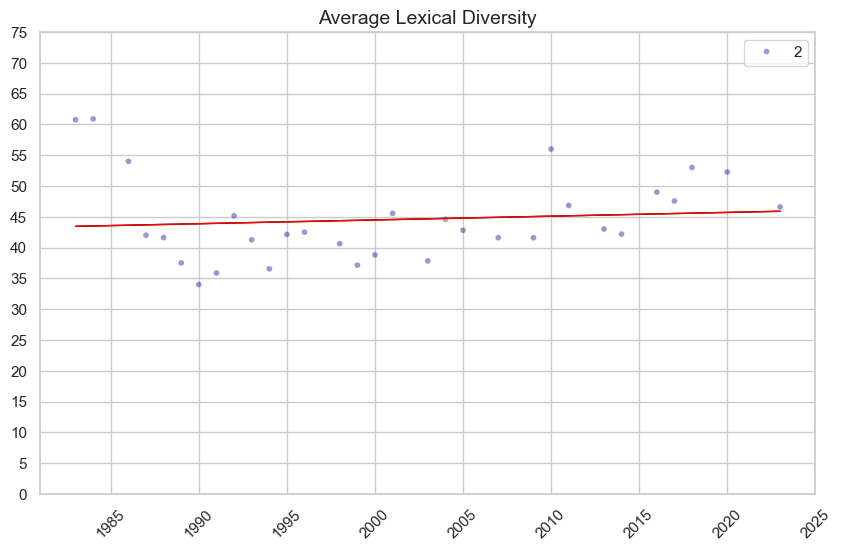

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'lex_diversity_per_year' is your DataFrame

# Step 1: Group by 'Year' and calculate the average lexical diversity
lex_diversity_per_year_3 = lex_diversity_per_year.groupby('Year').agg(
    av_lex_diversity=('lex_diversity', 'mean')
).reset_index()

# Step 2: Sort by average lexical diversity in descending order
lex_diversity_per_year_3 = lex_diversity_per_year_3.sort_values(by='av_lex_diversity', ascending=False)

# Step 3: Create the plot
plt.figure(figsize=(10, 6))

# Plot the data as a scatter plot
sns.scatterplot(data=lex_diversity_per_year_3, x='Year', y='av_lex_diversity', color='darkblue', alpha=0.4, size=2)

# Add a linear smooth line (with confidence intervals)
sns.regplot(
    data=lex_diversity_per_year_3,
    x='Year', y='av_lex_diversity',
    scatter=False,
    color='black',
    line_kws={"color": "black", "lw": 1},
    ci=True  # confidence interval
)

# Add a second smooth line (LOESS)
sns.regplot(
    data=lex_diversity_per_year_3,
    x='Year', y='av_lex_diversity',
    scatter=False,
    color='red',
    line_kws={"color": "red", "lw": 1},
    ci=True  # confidence interval
)

# Customize the plot
plt.title('Average Lexical Diversity', fontsize=14, ha='center')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(range(0, int(lex_diversity_per_year_3['av_lex_diversity'].max()) + 20, 5))

# Step 4: Save the plot as a PDF with 1000 dpi
plt.savefig("figures/lex_diversity_per_year_3.png", dpi=1000, format="png")

# Step 5: Clean up variables (optional)
del lex_diversity_per_year
del lex_diversity_per_year_3

# Show the plot
plt.show()


In all of the above we have studied the lyrics words and lexical diversity using absolute measures. A more illuminating picture can be obtained using relativistic measures such as lexical density, which is a normalized lexical diversity.

## **Lexical density**

**Lexical density** is defined as the number of unique words in a song divided by the total number of words in that song.
This is an indicator of *word repetition*, which is an important tool for the lyricist songwriter's tool.
As lexical density increases, repetition decreases.


Note that this does not imply *sequential repetition*, which is yet another songwriting trick. In the following we will investigate the lexical diversity of amr diab's songs.

The overall average density is: 44.7831715210356


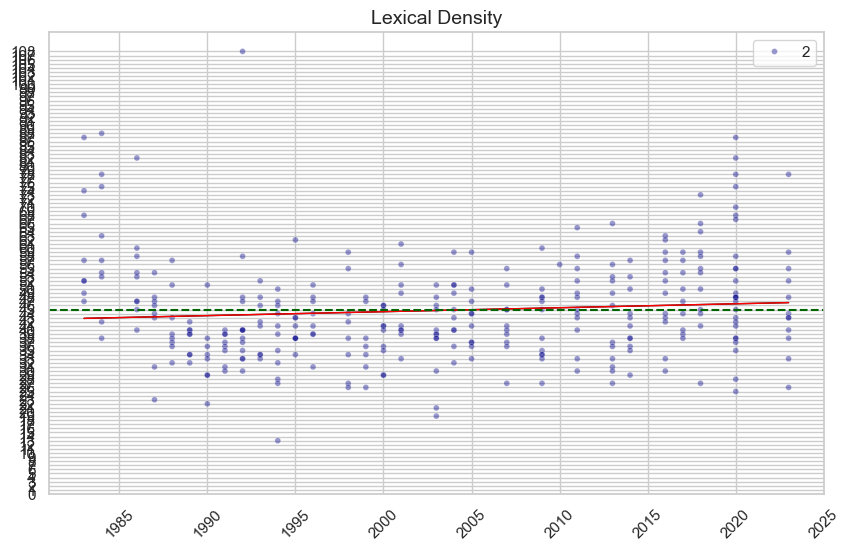

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter and compute lexical density
# Calculate lexical density using apply and split to tokenize the Lyrics
# Ensure that each lyric is a string and join all lyrics per song before splitting into words
lex_density_per_year = songs_proc.dropna(subset=['Decade', 'Year', 'Lyrics']) \
    .groupby(['Year', 'Song']) \
    .agg(lex_density=('Lyrics', lambda x: len(set(' '.join(str(i) for i in x).split())))) \
    .reset_index() \
    .sort_values(by='lex_density', ascending=False)


# Step 2: Compute the overall average lexical density
overall_av_density = lex_density_per_year['lex_density'].mean()
print(f"The overall average density is: {overall_av_density}")

# Step 3: Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of lexical density
sns.scatterplot(data=lex_density_per_year, x='Year', y='lex_density', color='darkblue', alpha=0.4, size=2)

# Add a linear smooth line (with confidence intervals)
sns.regplot(
    data=lex_density_per_year,
    x='Year', y='lex_density',
    scatter=False,
    color='black',
    line_kws={"color": "black", "lw": 1},
    ci=True  # confidence interval
)

# Add a second smooth line (LOESS)
sns.regplot(
    data=lex_density_per_year,
    x='Year', y='lex_density',
    scatter=False,
    color='red',
    line_kws={"color": "red", "lw": 1},
    ci=True  # confidence interval
)

# Add a horizontal line for the overall average density
plt.axhline(y=overall_av_density, color='darkgreen', linestyle='--')

# Customize the plot
plt.title('Lexical Density', fontsize=14, ha='center')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(range(0, int(lex_density_per_year['lex_density'].max()) + 1, 1))

# Step 4: Save the plot with 1000 dpi
plt.savefig("figures/density_plot.png", dpi=1000, format="png")

# Step 5: Show the plot
plt.show()


It is noticeable that most of the songs have a lexical density above 0.6, indicating the richness of the lyrical content in Amr Diab's songs. A slight decline in density over time can be observed, which can be quantified using the linear estimator as:
(0.77−0.57)/(1986−1948)=0.005
This suggests that the lexical density decreases by 0.5% per year, a relatively small amount. The decline could also be attributed to the decreasing number of samples over time, as Amr Diab's activity was higher during the earlier years of his career, with a decline in more recent years.

The density points appear to be roughly uniformly distributed over the interval [0.4, 1] each year. The green dashed line represents the overall average of the lexical density across all songs in the dataset, which turns out to be approximately 0.706.

Additionally, the loess estimator, overlaid on the line regressor, reveals an interesting trend. This pattern indicates how Amr Diab may have intentionally chosen a balance between the length and density of his lyrics. This could also be indicative of the diversity in his musical mediums, such as songs released for films, TV, and other venues like concerts.

There are extreme cases regarding lexical density, with some songs having very dense lyrics, while others are sparse. Examples of dense songs include "بلدنا بالمصري" (Our Country in Egyptian) in 2007 and "وياك" (With You) in 1997. On the other hand, sparse songs include "نور العين" (Light of My Eye) in 1996 and "تملي معاك" (Always With You) in 1994.

Next we smooth the previous figure by aggregating the songs in any given year by one number representing the average density of the songs in that year.

In [82]:
import pandas as pd

# Assuming 'lex_density_per_year' is your DataFrame
lex_density_per_year_2 = lex_density_per_year.groupby('Year').agg(av_lex_density=('lex_density', 'mean')).reset_index()

# Sort by average lexical density
lex_density_per_year_2 = lex_density_per_year_2.sort_values(by='av_lex_density', ascending=False)


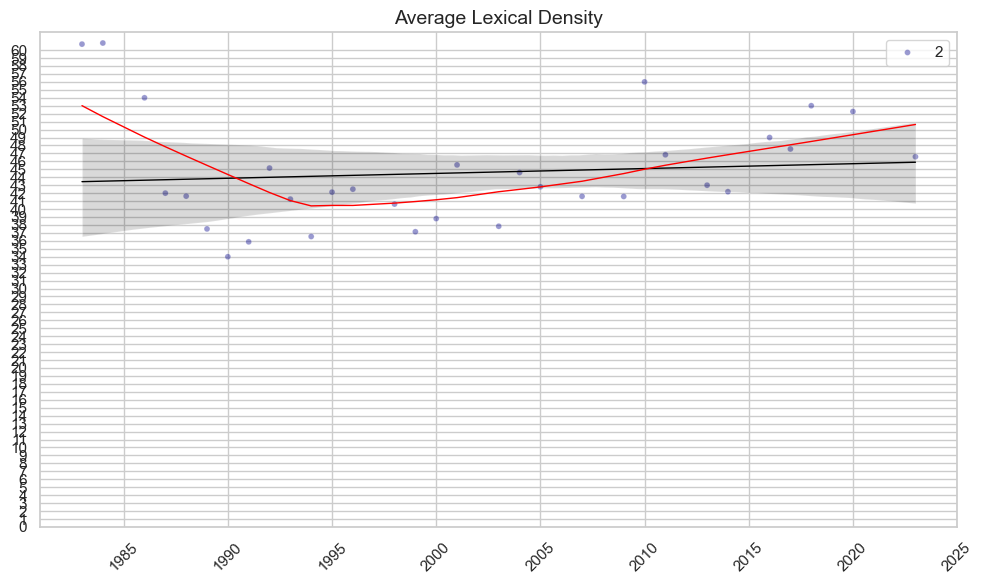

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the average lexical density
plot = sns.scatterplot(
    data=lex_density_per_year_2,
    x="Year", y="av_lex_density",
    color='darkblue',
    alpha=0.4,
    size=2
)

# Add a linear smoother (black line)
sns.regplot(
    data=lex_density_per_year_2,
    x="Year", y="av_lex_density",
    scatter=False,
    color='black',
    line_kws={"color": "black", "lw": 1}
)

# Add a loess smoother (red line)
sns.regplot(
    data=lex_density_per_year_2,
    x="Year", y="av_lex_density",
    scatter=False,
    color='red',
    line_kws={"color": "red", "lw": 1},
    lowess=True
)

# Customize the plot
plt.title('Average Lexical Density', fontsize=14, ha='center')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(range(0, int(lex_density_per_year_2['av_lex_density'].max()) + 1, 1))
plt.tight_layout()
plt.show()


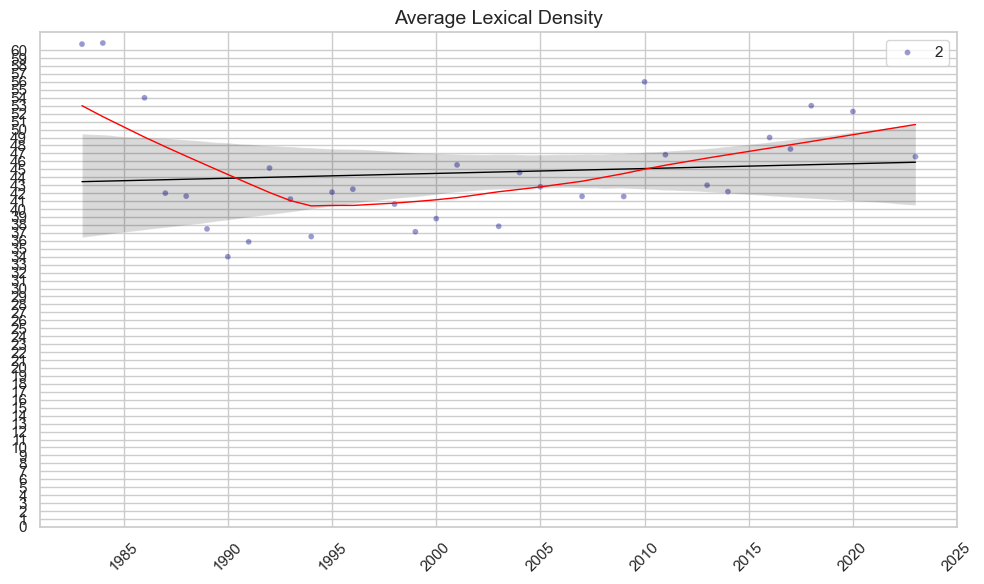

In [ ]:
# Save the plot as a PDF with 1000 dpi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lex_density_per_year_2, x="Year", y="av_lex_density", color='darkblue', alpha=0.4, size=2)
sns.regplot(data=lex_density_per_year_2, x="Year", y="av_lex_density", scatter=False, color='black', line_kws={"color": "black", "lw": 1})
sns.regplot(data=lex_density_per_year_2, x="Year", y="av_lex_density", scatter=False, color='red', line_kws={"color": "red", "lw": 1}, lowess=True)
plt.title('Average Lexical Density', fontsize=14, ha='center')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks(range(0, int(lex_density_per_year_2['av_lex_density'].max()) + 1, 1))
plt.tight_layout()
plt.savefig('figures/lex_density_per_year_2.png', dpi=1000, format='png')


In [85]:
# Remove the variables if you want to clear them after the task
del lex_density_per_year
del lex_density_per_year_2


Next we study the evolution of both lexical diversity and lexical density per decade to have a closer finer look and how they co-evolve together.

In [86]:
lex_diversity_over_decade = (
    songs_proc
    .assign(Lyrics=songs_proc["Lyrics"].apply(lambda lyrics: str(lyrics).split()))  # Count words
    .dropna(subset=['Decade', 'Year'])  # filter out rows where Decade or Year is NA
    .loc[:, ['Decade', 'Song', 'Lyrics']]  # select Decade, Song, Lyrics
    .groupby(['Decade', 'Song'])  # group by Decade and Song
    .agg(lex_diversity=('Lyrics', lambda x: len(set([word for sublist in x for word in sublist]))))  # flatten list before counting unique words
    .reset_index()
    .loc[:, ['Decade', 'lex_diversity']]  # keep Decade and lex_diversity
    .groupby('Decade')  # group by Decade again
    .agg(**{'Mean lex diversity': ('lex_diversity', 'mean')})  # mean lex_diversity per decade
    .reset_index()
)

print(lex_diversity_over_decade)

        Decade  Mean lex diversity
0  Early 1980s           60.823529
1  Early 1990s           39.125000
2  Early 2000s           41.414634
3  Early 2010s           44.388889
4  Early 2020s           50.473684
5   Late 1980s           44.090909
6   Late 1990s           40.709677
7   Late 2000s           41.968750
8   Late 2010s           50.060606


In [87]:
lex_density_over_decade = (
    songs_proc
    .assign(Lyrics=songs_proc["Lyrics"].apply(lambda lyrics: str(lyrics).split()))  # Split lyrics into words
    .dropna(subset=['Decade', 'Year'])  # Filter out rows where Decade or Year is NA
    .loc[:, ['Decade', 'Song', 'Lyrics']]  # Select Decade, Song, Lyrics
    .groupby(['Decade', 'Song'])  # Group by Decade and Song
    .apply(lambda group: group.assign(no_words=group['Lyrics'].apply(lambda x: len(x)).sum()))  # Count words per song
    .reset_index(drop=True)
    .assign(lex_diversity=lambda df: df['Lyrics'].apply(lambda x: len(set(x))))  # Calculate lex_diversity
    .assign(lex_density=lambda df: df['lex_diversity'] / df['no_words'])  # Calculate lex_density
    .groupby('Decade')  # Group by Decade
    .agg({'lex_density': 'mean'})  # Mean lex_density per decade
    .rename(columns={'lex_density': 'Mean lex density'})  # Rename column
    .reset_index()
)

print(lex_density_over_decade)

        Decade  Mean lex density
0  Early 1980s          0.430273
1  Early 1990s          0.270308
2  Early 2000s          0.338431
3  Early 2010s          0.396177
4  Early 2020s          0.396366
5   Late 1980s          0.243432
6   Late 1990s          0.286116
7   Late 2000s          0.356576
8   Late 2010s          0.400336


/var/folders/c9/w9mj099n3fl4lvfzh682yr740000gn/T/ipykernel_33472/4216526950.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [88]:
# Assuming lex_diversity_over_decade and lex_density_over_decade are already defined

# Perform the inner join on 'Decade'
lex_diversity_density_over_decade = pd.merge(
    lex_diversity_over_decade,
    lex_density_over_decade,
    on='Decade',  # join by Decade column
    how='inner'  # inner join
)

# Multiply 'Mean lex density' by 100 for proper plotting and comparison
lex_diversity_density_over_decade['Mean lex density'] *= 100

print(lex_diversity_density_over_decade)

        Decade  Mean lex diversity  Mean lex density
0  Early 1980s           60.823529         43.027346
1  Early 1990s           39.125000         27.030835
2  Early 2000s           41.414634         33.843110
3  Early 2010s           44.388889         39.617740
4  Early 2020s           50.473684         39.636614
5   Late 1980s           44.090909         24.343221
6   Late 1990s           40.709677         28.611624
7   Late 2000s           41.968750         35.657615
8   Late 2010s           50.060606         40.033577


In [89]:
# 1. Reshape the Data
lex_diversity_density_over_decade = lex_diversity_density_over_decade.melt(
    id_vars=['Decade'], 
    value_vars=['Mean lex density', 'Mean lex diversity'], 
    var_name='lex_div_den', 
    value_name='value'
)

# 2. Extract years and classify "Early"/"Late"
lex_diversity_density_over_decade['years'] = lex_diversity_density_over_decade['Decade'].str.extract(r'(\d{4})').astype(float)
lex_diversity_density_over_decade['part'] = np.where(lex_diversity_density_over_decade['Decade'].str.contains('Early'), 0, 1)

# 3. Sort by years and part, then drop extra columns
lex_diversity_density_over_decade = lex_diversity_density_over_decade.sort_values(by=['years', 'part']).drop(columns=['years', 'part'])

# 4. Set custom order for Decade
lex_diversity_density_over_decade['Decade'] = pd.Categorical(
    lex_diversity_density_over_decade['Decade'], 
    categories=['Early 1980s', 'Late 1980s', 'Early 1990s', 'Late 1990s', 'Early 2000s', 'Late 2000s', 'Early 2010s', 'Late 2010s',  'Early 2020s'], 
    ordered=True
)

# Print the result
print(lex_diversity_density_over_decade)

         Decade         lex_div_den      value
0   Early 1980s    Mean lex density  43.027346
9   Early 1980s  Mean lex diversity  60.823529
5    Late 1980s    Mean lex density  24.343221
14   Late 1980s  Mean lex diversity  44.090909
1   Early 1990s    Mean lex density  27.030835
10  Early 1990s  Mean lex diversity  39.125000
6    Late 1990s    Mean lex density  28.611624
15   Late 1990s  Mean lex diversity  40.709677
2   Early 2000s    Mean lex density  33.843110
11  Early 2000s  Mean lex diversity  41.414634
7    Late 2000s    Mean lex density  35.657615
16   Late 2000s  Mean lex diversity  41.968750
3   Early 2010s    Mean lex density  39.617740
12  Early 2010s  Mean lex diversity  44.388889
8    Late 2010s    Mean lex density  40.033577
17   Late 2010s  Mean lex diversity  50.060606
4   Early 2020s    Mean lex density  39.636614
13  Early 2020s  Mean lex diversity  50.473684


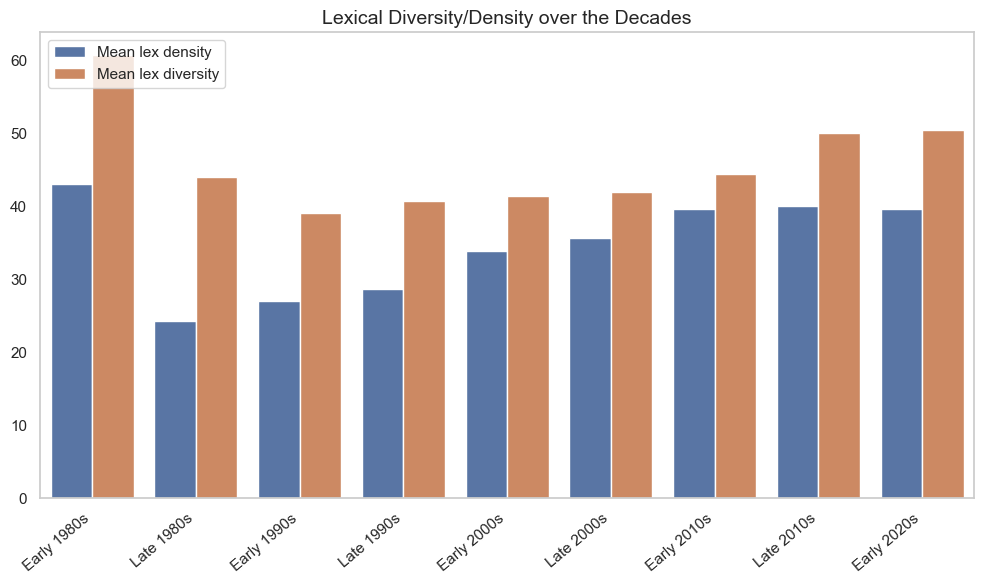

/var/folders/c9/w9mj099n3fl4lvfzh682yr740000gn/T/ipykernel_33472/3196785333.py:27: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [90]:
# Plotting using Seaborn 
plt.figure(figsize=(10, 6))

# Create a bar plot with 'Decade' on x-axis and 'value' on y-axis
sns.barplot(
    x="Decade", 
    y="value", 
    hue="lex_div_den", 
    data=lex_diversity_density_over_decade,
    dodge=True
)

# Formatting the plot
plt.title("Lexical Diversity/Density over the Decades", fontsize=14, ha="center")
plt.xlabel("")  # Remove x-axis label
plt.ylabel("")  # Remove y-axis label
plt.xticks(rotation=40, ha="right")  # Rotate x-axis labels
plt.grid(False)  # Remove minor grid lines
plt.legend(title="", loc="upper left")  # Remove legend title and position

# Show the plot
plt.tight_layout()
plt.show()


# Show interactive Plotly plot
fig.show()


In [ ]:

plt.savefig("figures/div_density_over_decade.png", format="png", dpi=1000)

<Figure size 640x480 with 0 Axes>

In [92]:
del lex_diversity_over_decade
del lex_density_over_decade
del lex_diversity_density_over_decade
del fig

## **TF-IDF**

The method that we have been using so far looks at the entire dataset, but it has not addressed how to quantify just how important various terms are in a document with respect to an entire collection. In the analysis above we have removed stopwords and looked at term frequency,
but this is not the most sophisticated approach, especially from a relativistic perspective. An advanced alternative is the use of **TF-IDF**, where TF stands for "Term Frequency" and IDF stands for "Inverse Term Frequency". TF-IDF assigns a lower weight to commonly used words 
and higher weights to words that are not used much in the given collection.

When TF and IDF are combined, a term's significance is adjusted for how rarely it is used. The assumption behind TF-IDF is that **terms that appear more frequently in a document should be given a higher weight, unless it also appears in many documents**. It can be formulated as
follows: 

- Term Frequency (TF): Number of times a term occurs in a document (fixing the document). 
- Document Frequency (DF): Number of documents that contain each word (fixing the word). 
- Inverse Document Frequency (IDF) = 1/DF 
- TF-IDF = TF * IDF

The IDF of any term is therefore a higher number for words that occur in fewer of the documents in the collection, so it is a kind of rare words from which their importance are driven. 
We will next see this approach to examine the most important words per year/decade/and overall.


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Filter out missing values and words with fewer than 4 characters
songs_proc_filtered = songs_proc[songs_proc['Lyrics'].notna() & songs_proc['Song'].notna()]
songs_proc_filtered = songs_proc_filtered[songs_proc_filtered['Lyrics'].str.len() > 3]

# Ensure Lyrics column is a string (if it contains lists)
songs_proc_filtered['Lyrics'] = songs_proc_filtered['Lyrics'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Step 2: Group by Song and Lyrics, then count occurrences
word_counts = songs_proc_filtered.groupby(['Song', 'Lyrics']).size().reset_index(name='n')

# Step 3: Apply TF-IDF computation
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\b\w{4,}\b')
tfidf_matrix = vectorizer.fit_transform(word_counts['Lyrics'])
tfidf_scores = tfidf_matrix.toarray()

# Convert the TF-IDF scores into a DataFrame
tfidf_df = pd.DataFrame(tfidf_scores, columns=vectorizer.get_feature_names_out())

# Add Song and Lyrics back to the DataFrame
tfidf_df['Song'] = word_counts['Song']
tfidf_df['Lyrics'] = word_counts['Lyrics']

# Step 4: Arrange by descending TF-IDF score
# Exclude non-numeric columns before calculating max
numeric_columns = tfidf_df.select_dtypes(include=['number']).columns
tfidf_df['tf_idf'] = tfidf_df[numeric_columns].max(axis=1)  # Maximum TF-IDF score per word

# Sort by TF-IDF values in descending order
tfidf_df = tfidf_df.sort_values(by='tf_idf', ascending=False)

# Print or return the final DataFrame
tfidf_df

ابات  ابتدا  ابتدي  ابتديت  ابتسامات  ابتسامتك  ابتسامته  ابتسامتي  \
222   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
96    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
68    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
93    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
170   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
..    ...    ...    ...     ...       ...       ...       ...       ...   
244   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
195   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
181   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
252   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
269   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   

     ابتسامه      ابدا  ...  يومك  يومها  يومي  يومين  يومينهم      چانا  \
222      0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   
96       0.0  0.027879  ...   0.0    0.0   0.0    0.0      0.0  0.976814   
68       0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   
93       0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   
170      0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   
..       ...       ...  ...   ...    ...   ...    ...      ...       ...   
244      0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   
195      0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   
181      0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   
252      0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   
269      0.0  0.000000  ...   0.0    0.0   0.0    0.0      0.0  0.000000   

     ڤيزا          Song  \
222   0.0          ماله   
96    0.0           جنا   
68    0.0  اهو ليل وعدى   
93    0.0      جامدة بس   
170   0.0        عودوني   
..    ...           ...   
244   0.0      من العشم   
195   0.0      كل حياتي   
181   0.0  قدام مرايتها   
252   0.0  نغمة الحرمان   
269   0.0     وانا معاك   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Lyrics  \
222  ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله 

now drop the scores of all the words and only show the word with the highest score in each song

In [94]:
# Step 5: Drop NaN values
tfidf_df = tfidf_df.dropna()

# Step 6: Find the word with the maximum TF-IDF for each song
# 1. Keep only numeric columns (the words)
word_columns = tfidf_df.select_dtypes(include=['number']).columns.drop('tf_idf')

# 2. For each row, find the word with the maximum TF-IDF
tfidf_df['top_word'] = tfidf_df[word_columns].idxmax(axis=1)

# Now the dataframe will have: 'Song', 'Lyrics', 'tf_idf', and 'top_word'
final_tf_idf = tfidf_df[['Song', 'Lyrics', 'top_word', 'tf_idf']]

# Sort if needed
final_tf_idf = final_tf_idf.sort_values(by='tf_idf', ascending=False)

# Display
final_tf_idf


Song  \
222          ماله   
96            جنا   
68   اهو ليل وعدى   
93       جامدة بس   
170        عودوني   
..            ...   
244      من العشم   
195      كل حياتي   
181  قدام مرايتها   
252  نغمة الحرمان   
269     وانا معاك   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Lyrics  \
222  ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله حبيته جوه عينيا وداريته ماله حبيته جوه عينيا وداريته حبيته جوه عينيا داريته حبيته جوه عينيا داريته انا ليلي نهاري فكري مشغول انساه دلوني معقول انا ليلي نهاري فكري مشغول انساه دلوني معقول قولوا تقولوا حبه بصونه قولوا تقولوا حبه بصونه قولوا تقولوا حبه بصونه والله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله حبيته جوه عينيا وداريته ماله حبيته جوه عينيا وداريته حبيته جوه عينيا داريته حبيته جوه عينيا داريته ادنا مالكم بيا وبخلي عايزين خصامنا انا وحبيب عمري ادنا مالكم بيا وبخلي عايزين خصامنا انا وحبيب عمري ايه هيعود فراقنا عايزين خصامنا ايه هيعود فراقنا عايزين خصامنا والله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله حبيته جوه عينيا وداريته ماله حبيته جوه عينيا وداريته حبيته جوه عينيا داريته حبيته جوه عينيا داريته عيوني السهاري فين قلبي ساب الليل ويايا وخد معاه عمري عيوني السهاري فين قلبي ساب الليل ويايا وخد معاه عمري داروا عيونكو حسدتونا اه نار شافونا داروا عيونكو حسدتونا اه نار شافونا داروا عيونكو حسدتونا اه نار شافونا والله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله   
96                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [95]:
#save table
final_tf_idf.to_csv('./data/final_tf_idf.csv', index=False)

The following table gives the topmost words with respect to their TF-IDF values.


In [96]:

# Select the top 10 rows
topmost = 10
top_words_table = final_tf_idf.head(topmost)

top_words_table

Song  \
222          ماله   
96            جنا   
68   اهو ليل وعدى   
93       جامدة بس   
170        عودوني   
105         حبينا   
91           توبة   
87          تعالي   
210  ليلة من عمري   
51    العالم الله   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Lyrics  \
222  ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله حبيته جوه عينيا وداريته ماله حبيته جوه عينيا وداريته حبيته جوه عينيا داريته حبيته جوه عينيا داريته انا ليلي نهاري فكري مشغول انساه دلوني معقول انا ليلي نهاري فكري مشغول انساه دلوني معقول قولوا تقولوا حبه بصونه قولوا تقولوا حبه بصونه قولوا تقولوا حبه بصونه والله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله حبيته جوه عينيا وداريته ماله حبيته جوه عينيا وداريته حبيته جوه عينيا داريته حبيته جوه عينيا داريته ادنا مالكم بيا وبخلي عايزين خصامنا انا وحبيب عمري ادنا مالكم بيا وبخلي عايزين خصامنا انا وحبيب عمري ايه هيعود فراقنا عايزين خصامنا ايه هيعود فراقنا عايزين خصامنا والله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله حبيته جوه عينيا وداريته ماله حبيته جوه عينيا وداريته حبيته جوه عينيا داريته حبيته جوه عينيا داريته عيوني السهاري فين قلبي ساب الليل ويايا وخد معاه عمري عيوني السهاري فين قلبي ساب الليل ويايا وخد معاه عمري داروا عيونكو حسدتونا اه نار شافونا داروا عيونكو حسدتونا اه نار شافونا داروا عيونكو حسدتونا اه نار شافونا والله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله   
96                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

The top song (index 222) is “ماله” with a very high tf-idf score of 0.987754, meaning its lyrics are especially unique — mainly because the word “ماله” (and a few others) is repeated many times across the lyrics.


The following shows the converse, namely the words with least TF-IDF values, which are words that are either very atypical in any particular song or very typical across many songs.
The following table gives the lowermost words with respect to their TF-IDF values.

In [97]:
# Select the top 10 rows
lowermost = 10
lower_words_table = final_tf_idf.tail(lowermost)

lower_words_table

Song  \
2     كان كل حاجة   
200   كنت في بالي   
214  ما أقدرش أنا   
74          بتهزر   
164       على حبك   
244      من العشم   
195      كل حياتي   
181  قدام مرايتها   
252  نغمة الحرمان   
269     وانا معاك   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Lyrics  \
2                                                                                                                                                                                                                                                                                                                                                                                                                                                         حاجه اغلي حاجه الاسم حبيبي ايديا نور عينيا وانا فكرته نصيبي روحي ايديه قلبي وعمري بحاله دنيتي غربتي طلعش حبيبي حبيبي حاجه اغلي حاجه الاسم حبيبي ايديا نور عينيا وانا فكرته نصيبي روحي ايديه قلبي وعمري بحاله دنيتي غربتي طلعش حبيبي حبيبي قلبي غصب سابني علي خلاني احبه قلبه عايش ولاحبابه هطمنله سابني اروح ايده حبني كانش سقاني عذابه قلبي غصب سابني علي خلاني احبه قلبه عايش ولاحبابه هطمنله سابني اروح ايده حبني كانش سقاني عذابه حاجه اغلي حاجه الاسم حبيبي ايديا نور عينيا وانا فكرته نصيبي روحي ايديه قلبي وعمري بحاله دنيتي غربتي طلعش حبيبي حبيبي حاجه اغلي حاجه الاسم حبيبي ايديا نور عينيا وانا فكرته نصيبي روحي ايديه قلبي وعمري بحاله دنيتي غربتي طلعش حبيبي حبيبي   
200                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  انت بالي حالا مفيش عايش عارف تعيش انا كتير سبتك وحاسس انك انت سبتنيش يهمنيش سايب واحده النتيجه انا وانت طالعين خسرانين وانا بخير هيجي الخير منين فكره انك رحت قابلها شوف نهايه انا وانت نستاهلها انت هتقول نسيت واسمعها هعتبرك كانك قايلها اه فكره انك رحت قابلها شوف نهايه انا وانت نستاهلها انت هتقول نسيت واسمعها هعتبرك كانك قايلها ناس كتيره بتتهمني حبي ليك قالوا عشت بهمل وانا بهتم بيك وانا تاه وانا بيدور نسياني ليك صدقني هقدر وانت مقاسمني حلم حلمت وانساك بايه وانت مصاحبني ميه طريق وانا ماشي فكره انك رحت قابلها شوف نهايه انا وانت نستاهلها انت هتقول نسيت واسمعها هعتبرك كانك قايلها   
214                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

The following figure shows a histogram for the distribution of the tf-idf values across all the lyrics corpus, overlaid with normal and right-skewed density estimation. 

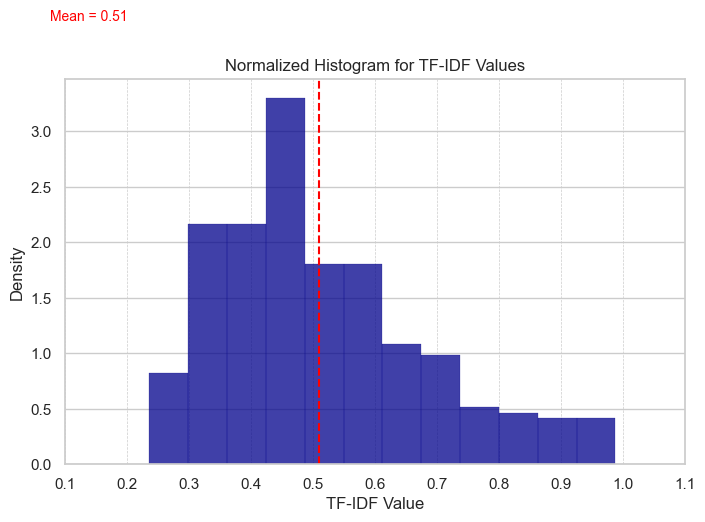

In [98]:
# Calculate the sample mean
sample_mean = round(final_tf_idf['tf_idf'].mean(), 2)

# Create the plot
plt.figure(figsize=(8, 5))
sns.histplot(
    tfidf_df['tf_idf'], 
    stat='density', 
    color='darkblue', 
    edgecolor='darkblue',
    linewidth=0.15
)

# Add vertical dashed red line at the mean
plt.axvline(x=sample_mean, color='red', linestyle='--')

# Add text for the mean
plt.text(
    x=0.2, 
    y=4, 
    s=f"Mean = {sample_mean}",
    color='red', 
    ha='right', 
    size=10
)

# Customize plot
plt.title("Normalized Histogram for TF-IDF Values", fontsize=12, ha='center')
plt.xlabel("TF-IDF Value")
plt.ylabel("Density")
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.xticks(ticks=plt.xticks()[0])  # Keep reasonable x-axis breaks

# Show the plot
plt.show()

It is clear that almost all the words in the corpus have tf-idf values below $0.5$. The empirical mean of the tf-idf values is $0.51$. However, to have a better view of the data distribution we resort to boxplots.

In [99]:
# Plotting the boxplot
fig = go.Figure()

fig.add_trace(go.Box(
    x=final_tf_idf['tf_idf'],
    name="TF-IDF",
    hoverinfo="x"
))

# Adjust the layout
fig.update_layout(
    title="Boxplot of TF-IDF Values",
    xaxis_title="TF-IDF",
    xaxis_tickformat=".2f"  # Format x-axis ticks to 2 decimal places
)

# Show the figure
fig.show()

The boxplot indicates that the upper fence, which cordons off outliers from the bulk of data is about 0.92 . So all higher tf-idfs are beyond 0.92 . The maximum as indicated in the table above is 0.99 . So quite few words are significant in the sense of having large tf-idf, in addition to be well separated from the large majority of the other tokens in the corpus.

In [ ]:
import plotly.io as pio

# Save the figure
pio.write_image(fig, 'figures/tf_idf_boxplot.png', format='png', width=800, height=600, scale=10)

The following is a word cloud of the most popular words (according to the TF-IDF measure) across the whole artistic career of Amr Diab.

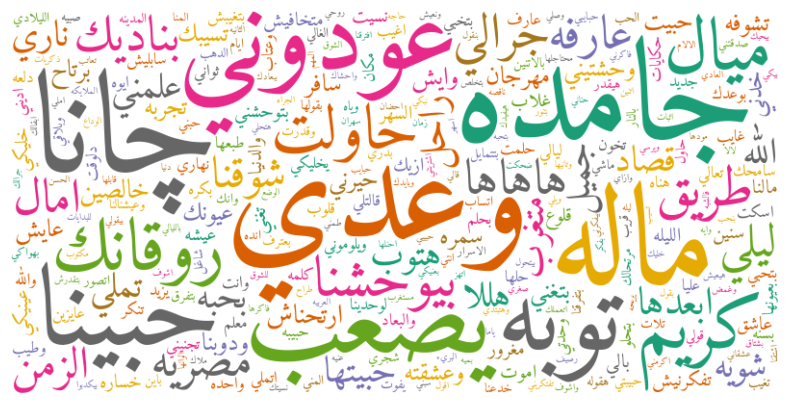

In [101]:

# Sort the DataFrame by TF-IDF in descending order
word_cloud_overall = final_tf_idf.sort_values(by='tf_idf', ascending=False)[['top_word', 'tf_idf']]

# Apply reshaping to the Arabic words
word_cloud_overall['top_word'] = word_cloud_overall['top_word'].apply(reshape_arabic_text)

# Create a dictionary for word cloud generation
wordcloud_data = dict(zip(word_cloud_overall['top_word'], word_cloud_overall['tf_idf']))

# Specify a font path that supports Arabic 
font_path = './Amiri-1.001/Amiri-Regular.ttf' 

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    max_words=300,
    min_font_size=10,
    max_font_size=150,
    colormap='Dark2',  # You can change the color scheme
    relative_scaling=0,  # Adjust word scaling
    random_state=21,
    contour_color='black',
    font_path=font_path  # Specify the font path for Arabic support
).generate_from_frequencies(wordcloud_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

Compared with the word cloud shown above based on just term frequency, there is a radical change (also seen from the boxplot) that very few words are important/significant when considering this information-theoretic tf-idf measure.


Next we do that analysis more finer by dividing it into the decades. So here the TF-IDF values are computed with respect only to the given decade.

In [102]:
del word_cloud_overall
del wordcloud_data
del wordcloud
del tfidf_df
del final_tf_idf



In [103]:
#group by Song, Lyrics, and Decade
word_counts = songs_proc_filtered.groupby(['Song', 'Lyrics','Decade']).size().reset_index(name='n')

# Apply TF-IDF computation
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\b\w{4,}\b')
tfidf_matrix = vectorizer.fit_transform(word_counts['Lyrics'])
tfidf_scores = tfidf_matrix.toarray()

# Convert the TF-IDF scores into a DataFrame
tfidf_df = pd.DataFrame(tfidf_scores, columns=vectorizer.get_feature_names_out())

# Add Song and Lyrics back to the DataFrame
tfidf_df['Song'] = word_counts['Song']
tfidf_df['Lyrics'] = word_counts['Lyrics']
tfidf_df['Decade'] = word_counts['Decade']

# Arrange by descending TF-IDF score
# Exclude non-numeric columns before calculating max
numeric_columns = tfidf_df.select_dtypes(include=['number']).columns
tfidf_df['tf_idf'] = tfidf_df[numeric_columns].max(axis=1)  # Maximum TF-IDF score per word

# Sort by TF-IDF values in descending order
tfidf_df = tfidf_df.sort_values(by='tf_idf', ascending=False)

# Print or return the final DataFrame
tfidf_df

ابات  ابتدا  ابتدي  ابتديت  ابتسامات  ابتسامتك  ابتسامته  ابتسامتي  \
222   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
96    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
68    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
93    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
170   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
..    ...    ...    ...     ...       ...       ...       ...       ...   
244   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
195   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
181   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
252   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
269   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   

     ابتسامه      ابدا  ...  يومها  يومي  يومين  يومينهم      چانا  ڤيزا  \
222      0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   
96       0.0  0.027879  ...    0.0   0.0    0.0      0.0  0.976814   0.0   
68       0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   
93       0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   
170      0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   
..       ...       ...  ...    ...   ...    ...      ...       ...   ...   
244      0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   
195      0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   
181      0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   
252      0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   
269      0.0  0.000000  ...    0.0   0.0    0.0      0.0  0.000000   0.0   

             Song  \
222          ماله   
96            جنا   
68   اهو ليل وعدى   
93       جامدة بس   
170        عودوني   
..            ...   
244      من العشم   
195      كل حياتي   
181  قدام مرايتها   
252  نغمة الحرمان   
269     وانا معاك   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Lyrics  \
222  ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله ماله ماله ماله ماله والله ماله ماله ماله حبيته جوه عينيا وداريته ماله حبيته جوه عينيا وداريته حبيته جوه

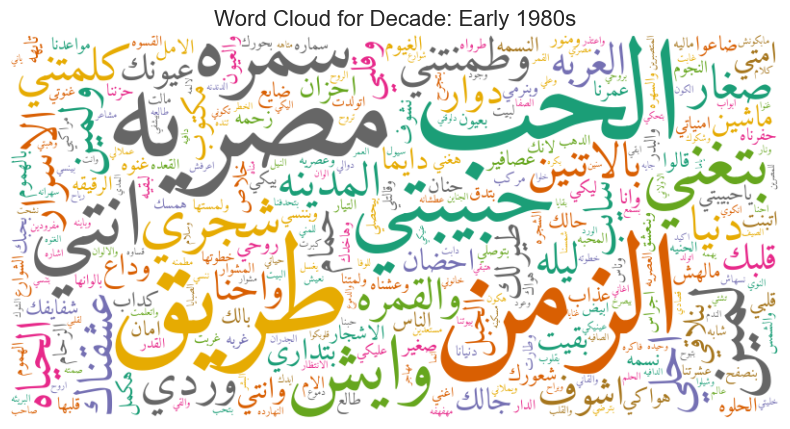

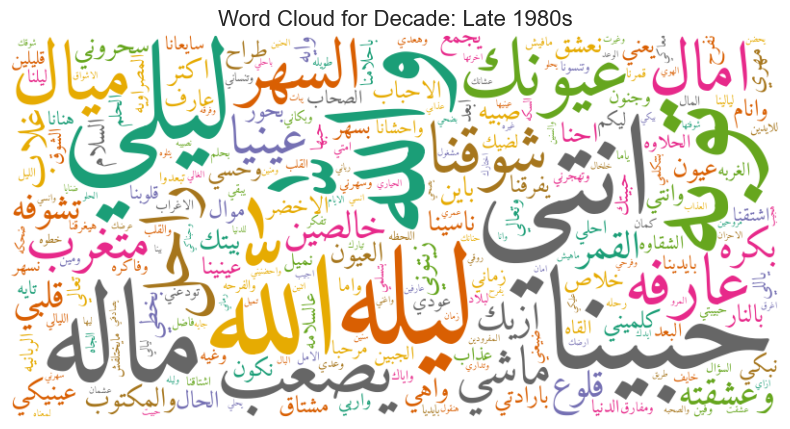

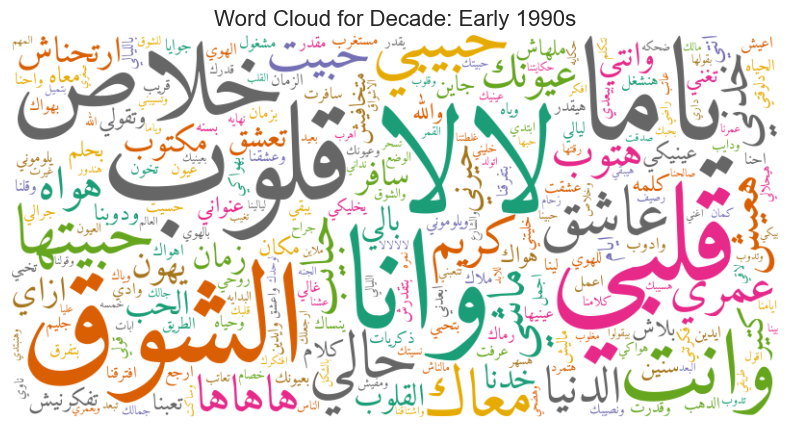

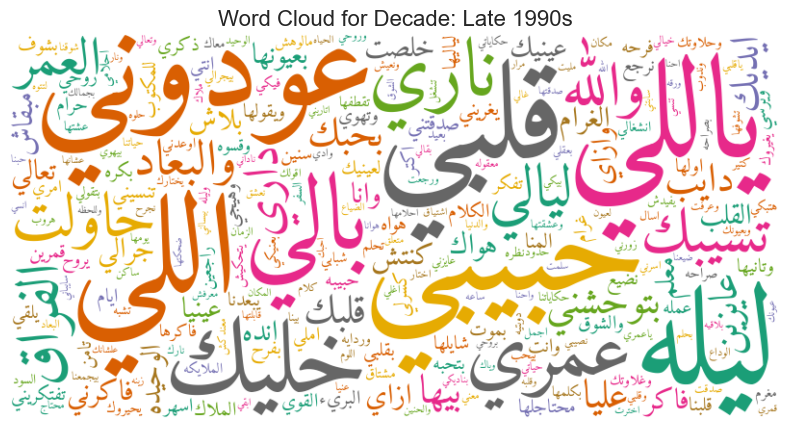

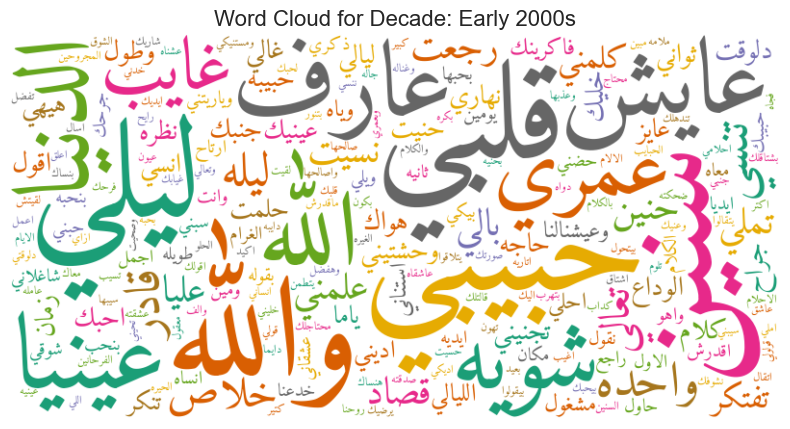

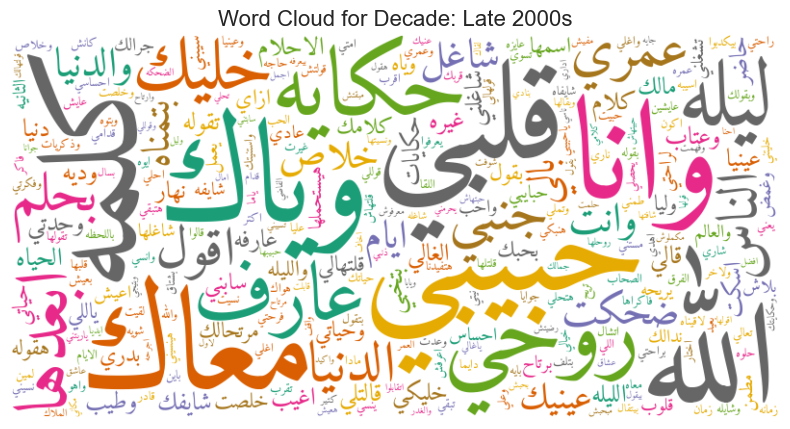

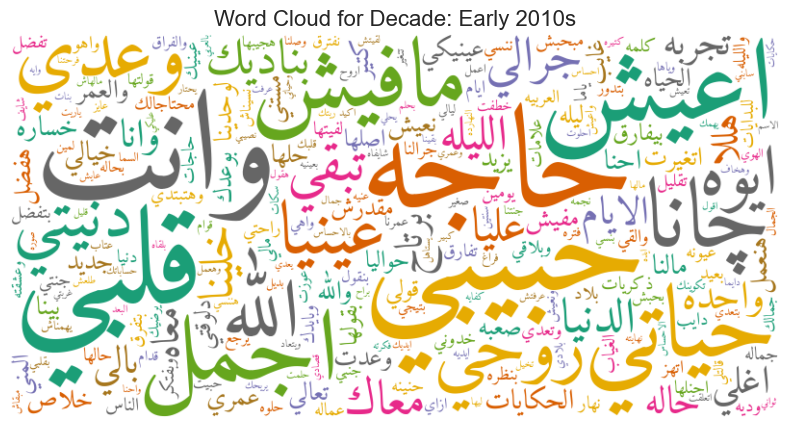

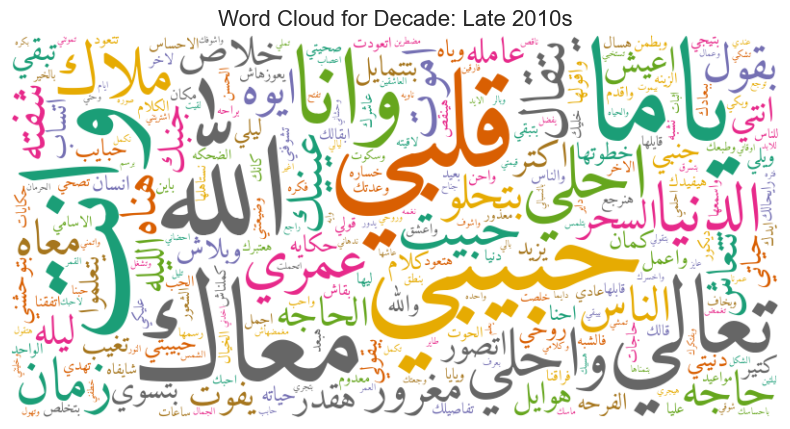

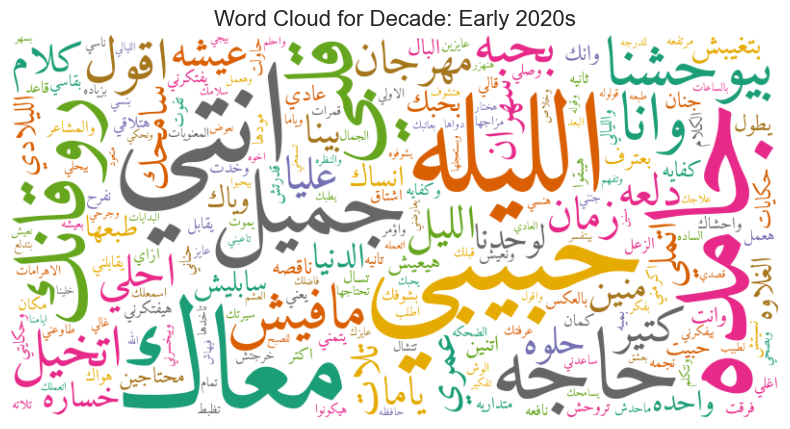

In [104]:
# 1. Prepare a dictionary to store wordclouds
decade_wordclouds = {}

# 2. Get all unique decades
decades = [
    "Early 1980s", "Late 1980s",
    "Early 1990s", "Late 1990s",
    "Early 2000s", "Late 2000s",
    "Early 2010s", "Late 2010s",
    "Early 2020s"
]

# 3. Font path for Arabic
font_path = './Amiri-1.001/Amiri-Regular.ttf' 

# 4. Loop over decades
for decade in decades:
    # Filter for the current decade
    decade_data = tfidf_df[tfidf_df['Decade'] == decade]

    # Select only word columns (exclude Song, Lyrics, Decade, tf_idf)
    word_columns = decade_data.select_dtypes(include=['number']).drop(columns='tf_idf')
    
    # Sum tf-idf across songs in that decade
    word_sums = word_columns.sum(axis=0)
    
    # Sort summed tf-idf in descending order
    word_sums_sorted = word_sums.sort_values(ascending=False)
    
    # Keep only top 300 words
    word_sums_top300 = word_sums_sorted.head(300)
    
    # Convert to dictionary {word: summed_tf_idf}
    word_freq_dict = word_sums_top300.to_dict()
    
    # Reshape Arabic words
    reshaped_word_freq_dict = {reshape_arabic_text(word): tfidf for word, tfidf in word_freq_dict.items()}
    
    # Generate Word Cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=300,
        min_font_size=10,
        max_font_size=150,
        colormap='Dark2',
        relative_scaling=0,
        random_state=21,
        contour_color='black',
        font_path=font_path
    ).generate_from_frequencies(reshaped_word_freq_dict)
    
    # Save the wordcloud
    decade_wordclouds[decade] = wordcloud
    
    # Plot the wordcloud
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Decade: {decade}", fontsize=16)
    plt.show()

In [105]:
# Now do the same operation as in R:
no_of_top_words = 10

# Drop duplicate Lyrics within each Decade and pick top N
popular_tfidf_words_per_decade = (
    tfidf_df.drop_duplicates(subset=['Lyrics', 'Decade'])  # distinct
           .sort_values(['Decade', 'tf_idf'], ascending=[True, False])  # sort by Decade then tf_idf desc
           .groupby('Decade')  # group by Decade
           .head(no_of_top_words)  # pick top 10
           .reset_index(drop=True)  # clean index
)

# Output
popular_tfidf_words_per_decade

ابات  ابتدا  ابتدي  ابتديت  ابتسامات  ابتسامتك  ابتسامته  ابتسامتي  \
0    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
1    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
2    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
3    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
4    0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
..   ...    ...    ...     ...       ...       ...       ...       ...   
85   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
86   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
87   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
88   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   
89   0.0    0.0    0.0     0.0       0.0       0.0       0.0       0.0   

    ابتسامه  ابدا  ...  يومها      يومي  يومين  يومينهم  چانا  ڤيزا  \
0       0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   
1       0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   
2       0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   
3       0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   
4       0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   
..      ...   ...  ...    ...       ...    ...      ...   ...   ...   
85      0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   
86      0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   
87      0.0   0.0  ...    0.0  0.052374    0.0      0.0   0.0   0.0   
88      0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   
89      0.0   0.0  ...    0.0  0.000000    0.0      0.0   0.0   0.0   

               Song  \
0   يا طريق يا طريق   
1             مصرية   
2             الزمن   
3        بتغني لمين   
4           يا سمرة   
..              ...   
85        إنت مغرور   
86          يتعلموا   
87       أحلى وأحلى   
88          يا هناه   
89        اجمل عيون   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Lyrics  \
0                                                                                                                                                                               طريق طريق ماشين طريق بقلوب عطشانه امل وسلام هواك ننسي كداب كداب يقول تاب قضي العمر معاك عذاب طريق طريق ماشين طريق اسامينا مزروعه قناديل سما لياليك اسامينا مزروعه قناديل سما لياليك صغرنا عايشين بيك نعشق اليك نفرح نلاقيك ونقولك اهلا بيك طريق طريق ماشين طريق طريق طريق ماشين طريق بقلوب عطشانه امل وسلام هواك ننسي كداب كداب يقول تاب قضي العمر معاك عذاب طريق طريق ماشين طريق دقينا ابواب وفارقنا اصحاب دقينا ابواب وفارقنا اصحاب طول عمرنا ملك ايديك نقرا الاحزان عينيك ونروح وبنرجع ليك ونقولك اهلا بيك طريق طريق ماشين طريق طريق طريق ماشين طريق بقلوب عطشانه امل وسلام هواك ننسي كداب كداب يقول تاب قضي العمر معاك عذاب طريق طريق م

In [106]:
# Make Decade a categorical column with specific order
popular_tfidf_words_per_decade['Decade'] = pd.Categorical(
    popular_tfidf_words_per_decade['Decade'],
    categories=decades,
    ordered=True
)

# Create the plot
fig = px.bar(
    popular_tfidf_words_per_decade,
    x='tf_idf',
    y='Lyrics',  # Assuming 'Word' is in 'Lyrics' column in your data
    facet_col='Decade',
    facet_col_wrap=3,
    color='Decade',
    orientation='h',
    title='Important Words Using TF-IDF per Decade',
    height=1000
)

# Customize axes, layout
fig.update_layout(
    showlegend=False,
    yaxis_title="Word",
    xaxis_title="TF-IDF",
    title_x=0.5,
    font=dict(size=10),
    bargap=0.3
)

# Rotate x-axis labels inside facets (for horizontal bar it's not critical, but clean to do)
fig.update_xaxes(tickangle=0)

# 5. Adjust y-axis ticks
fig.update_yaxes(tickfont=dict(size=8))

# 6. Display
fig.show()